In [1]:
pip install modin[ray] ray tqdm numpy matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.7 MB/s eta 0:00:00


In [7]:
pip install xgboost scikit-learn

First 5 rows of the dataset:
   Customer  Generator Capacity  Postcode Consumption Category       date  \
0         1                3.78      2076                   CL 2012-07-01   
1         1                3.78      2076                   GC 2012-07-01   
2         1                3.78      2076                   GG 2012-07-01   
3         1                3.78      2076                   CL 2012-07-02   
4         1                3.78      2076                   GC 2012-07-02   

    0:30   1:00   1:30   2:00   2:30  ...  20:00  20:30  21:00  21:30  22:00  \
0  1.250  1.250  1.250  1.263  0.131  ...  0.000  0.000  0.000  0.000  0.000   
1  0.855  0.786  0.604  0.544  0.597  ...  0.374  0.447  0.549  0.136  0.288   
2  0.000  0.000  0.000  0.000  0.000  ...  0.000  0.000  0.000  0.000  0.000   
3  1.250  1.250  1.125  0.000  0.925  ...  0.000  0.000  0.000  0.000  0.000   
4  0.309  0.082  0.059  0.097  0.290  ...  0.353  0.464  0.229  0.811  0.222   

   22:30  23:00  23:30   0:

ValueError: num must be an integer with 1 <= num <= 6, not 7

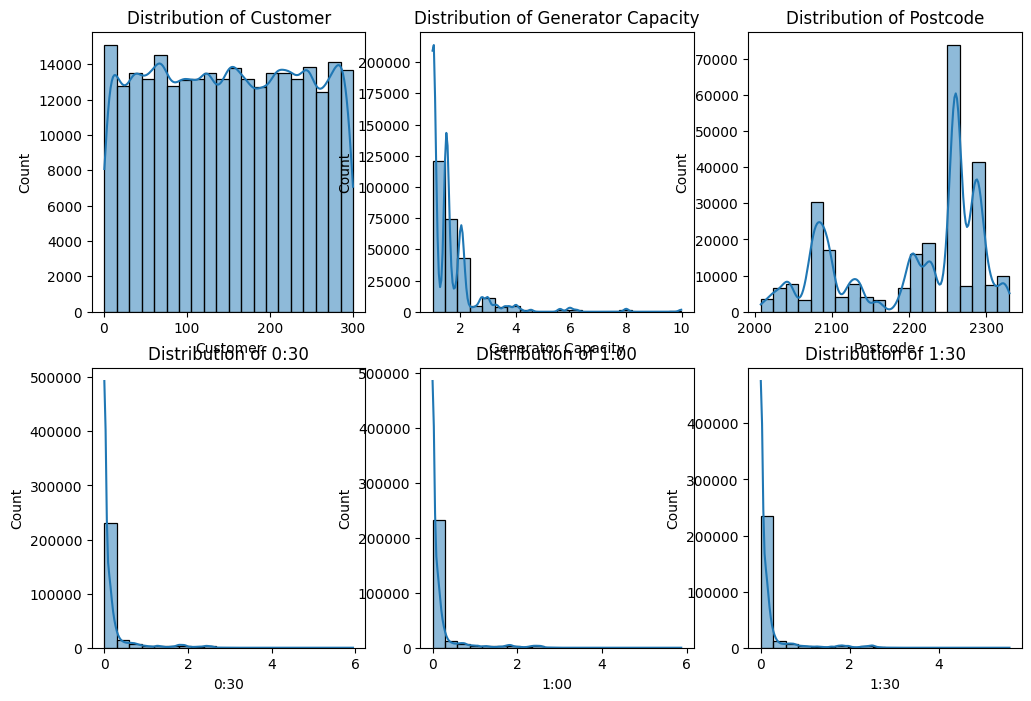

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data."""
    df = pd.read_csv(file_path, skiprows=1)
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')
    return df

def perform_eda(df: pd.DataFrame):
    """Perform exploratory data analysis on the dataset."""

    # Display the first few rows of the dataframe
    print("First 5 rows of the dataset:")
    print(df.head())

    # Display the shape of the dataframe
    print("\nDataset Shape:", df.shape)

    # Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())

    # Display basic statistics
    print("\nBasic Statistics:")
    print(df.describe(include='all'))

    # Convert 'Consumption Category' to categorical if it's not already
    if 'Consumption Category' in df.columns:
        df['Consumption Category'] = df['Consumption Category'].astype('category')

    # Visualize distributions of numeric columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    plt.figure(figsize=(12, 8))
    for i, col in enumerate(numeric_cols):
        plt.subplot(2, 3, i + 1)
        sns.histplot(df[col], bins=20, kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

    # Visualize categorical columns
    if 'Consumption Category' in df.columns:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df, x='Consumption Category')
        plt.title('Count of Consumption Categories')
        plt.xticks(rotation=45)
        plt.show()

    # Check correlation between numeric features
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
    plt.title('Correlation Matrix')
    plt.show()

    # Analyze temporal patterns if the date is present
    if 'date' in df.columns:
        df.set_index('date', inplace=True)
        plt.figure(figsize=(14, 7))
        df.resample('M').mean()['GC'].plot()  # Example for monthly average of generation consumption
        plt.title('Monthly Average Generation Consumption')
        plt.xlabel('Date')
        plt.ylabel('Average GC')
        plt.grid()
        plt.show()

def main():
    # Load and preprocess the data
    file_path = '/content/2012-2013 Solar home electricity data v2.csv'  # Update with your file path
    df = load_and_preprocess_data(file_path)

    # Perform EDA
    perform_eda(df)

if __name__ == "__main__":
    main()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268557 entries, 0 to 268556
Data columns (total 54 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Customer              268557 non-null  int64  
 1   Generator Capacity    268557 non-null  float64
 2   Postcode              268557 non-null  int64  
 3   Consumption Category  268557 non-null  object 
 4   date                  268557 non-null  object 
 5   0:30                  268557 non-null  float64
 6   1:00                  268557 non-null  float64
 7   1:30                  268557 non-null  float64
 8   2:00                  268557 non-null  float64
 9   2:30                  268557 non-null  float64
 10  3:00                  268557 non-null  float64
 11  3:30                  268557 non-null  float64
 12  4:00                  268557 non-null  float64
 13  4:30                  268557 non-null  float64
 14  5:00                  268557 non-null 

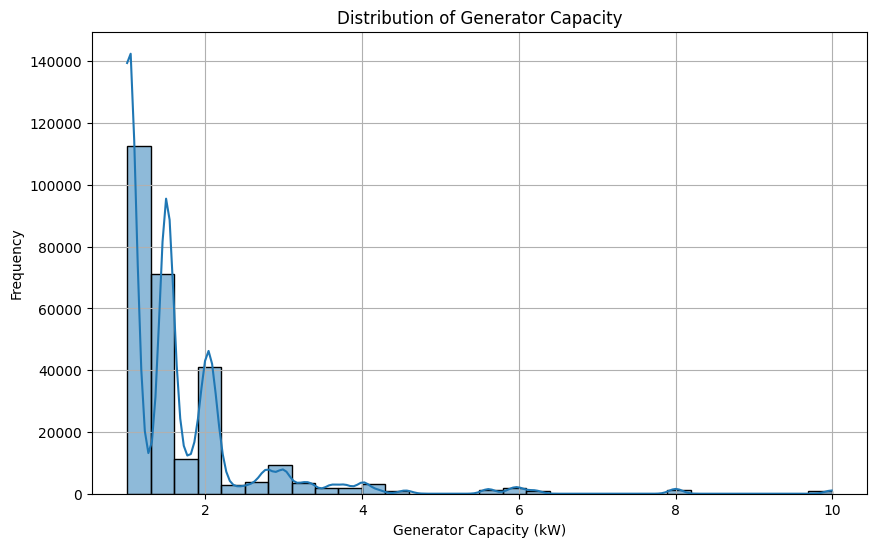

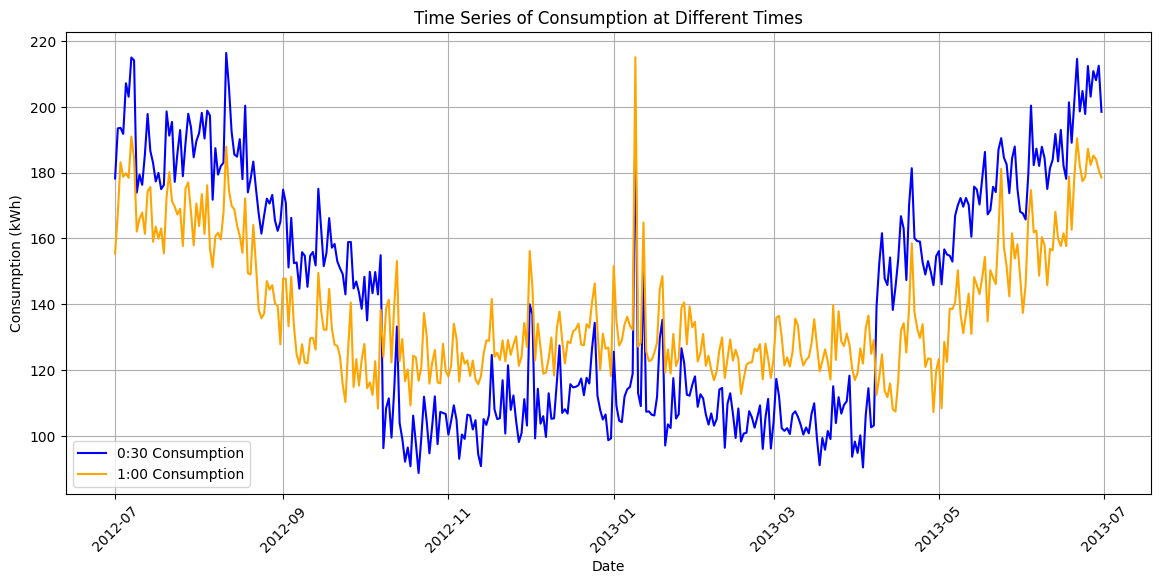

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7d4de5f564d0> (for post_execute):


KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

Error in callback <function flush_figures at 0x7d4de5f551b0> (for post_execute):


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data again in case you haven't done it in this session
file_path = '/content/2012-2013 Solar home electricity data v2.csv'  # Update with your file path
data = pd.read_csv(file_path, skiprows=1, low_memory=False)

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Display basic information about the dataset
print("Dataset Info:")
data.info()

# Display the first few rows of the dataset
print("\nFirst 5 rows:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:\n", missing_values[missing_values > 0])

# Summary statistics
print("\nSummary Statistics:\n", data.describe())

# Distribution of Generator Capacity
plt.figure(figsize=(10, 6))
sns.histplot(data['Generator Capacity'], bins=30, kde=True)
plt.title('Distribution of Generator Capacity')
plt.xlabel('Generator Capacity (kW)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

# Time Series Analysis: Aggregate consumption by date (if applicable)
# Convert the date column to datetime
data['date'] = pd.to_datetime(data['date'], format='%d/%m/%Y')

# Group by date and sum the consumption
time_series_data = data.groupby('date').sum(numeric_only=True)

plt.figure(figsize=(14, 6))
plt.plot(time_series_data.index, time_series_data['0:30'], label='0:30 Consumption', color='blue')
plt.plot(time_series_data.index, time_series_data['1:00'], label='1:00 Consumption', color='orange')
plt.title('Time Series of Consumption at Different Times')
plt.xlabel('Date')
plt.ylabel('Consumption (kWh)')
plt.legend()
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Pairplot for visualizing relationships between different consumption times
plt.figure(figsize=(12, 12))
sns.pairplot(data.loc[:, '0:30':'23:30'], diag_kind='kde')
plt.suptitle('Pairplot of Hourly Consumption', y=1.02)
plt.show()

# Correlation matrix heatmap
correlation_matrix = data.loc[:, '0:30':'23:30'].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Hourly Consumption')
plt.show()


In [ ]:
import pandas as pd

def load_first_ten_customers(file_path: str) -> pd.DataFrame:
    """Load data from the CSV file, skip the first row, and keep only the first 10 unique customers."""
    try:
        # Load the CSV file, skipping the first row
        data = pd.read_csv(file_path, header=1)

        # Print column names to confirm
        print("Column names after loading the data:")
        print(data.columns.tolist())

        # Get the first 10 unique customers
        unique_customers = data['Customer'].unique()[:100]

        # Filter the data for these customers
        filtered_data = data[data['Customer'].isin(unique_customers)]

        return filtered_data

    except Exception as e:
        print(f"Error loading data: {str(e)}")
        return None

def save_filtered_data(filtered_data: pd.DataFrame, output_file: str):
    """Save the filtered DataFrame to a CSV file."""
    try:
        filtered_data.to_csv(output_file, index=False)
        print(f"Filtered data saved to {output_file}")
    except Exception as e:
        print(f"Error saving data: {str(e)}")

if __name__ == "__main__":
    input_file = "/content/2012-2013 Solar home electricity data v2.csv"  # Replace with your input file path
    output_file = "/content/output_file.csv"  # Replace with your desired output file path

    first_ten_customers_data = load_first_ten_customers(input_file)

    if first_ten_customers_data is not None:
        save_filtered_data(first_ten_customers_data, output_file)


Column names after loading the data:
['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category', 'date', '0:30', '1:00', '1:30', '2:00', '2:30', '3:00', '3:30', '4:00', '4:30', '5:00', '5:30', '6:00', '6:30', '7:00', '7:30', '8:00', '8:30', '9:00', '9:30', '10:00', '10:30', '11:00', '11:30', '12:00', '12:30', '13:00', '13:30', '14:00', '14:30', '15:00', '15:30', '16:00', '16:30', '17:00', '17:30', '18:00', '18:30', '19:00', '19:30', '20:00', '20:30', '21:00', '21:30', '22:00', '22:30', '23:00', '23:30', '0:00', 'Row Quality']
Filtered data saved to /content/output_file.csv


Best Particle Position: [1.         0.56512722]
Best Score (Grid Consumption): 2738.7179999999994


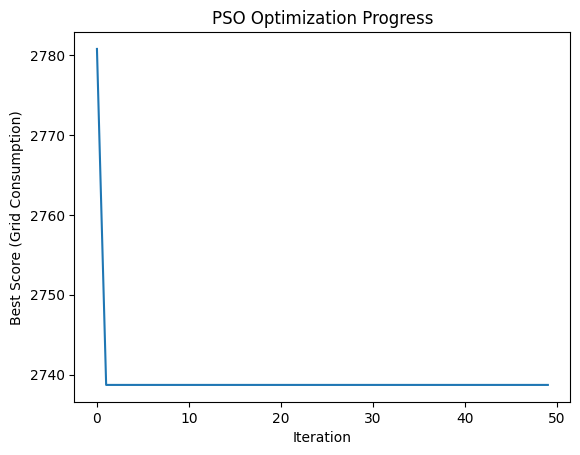

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple

# Constants
BATTERY_CAPACITY_MIN = 0  # kWh
BATTERY_CAPACITY_MAX = 20  # kWh
BATTERY_POWER_MIN = 0  # kW
BATTERY_POWER_MAX = 5  # kW

class Particle:
    def __init__(self, dim: int):
        self.position = np.random.uniform(low=0, high=1, size=dim)
        self.velocity = np.random.uniform(low=-1, high=1, size=dim)
        self.best_position = self.position.copy()
        self.best_score = float('inf')

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data."""
    df = pd.read_csv(file_path, skiprows=1)
    df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y', errors='coerce')

    # Melt to long format
    df_melted = df.melt(
        id_vars=['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category', 'date', 'Row Quality'],
        var_name='Time', value_name='Consumption'
    )

    df_melted['Time'] = df_melted['Time'].str.strip()  # Clean 'Time' values
    df_melted['datetime'] = pd.to_datetime(
        df_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + df_melted['Time'], errors='coerce'
    )

    df_melted.drop(columns=['date', 'Time', 'Row Quality'], inplace=True)

    # Pivot data to wide form
    df_pivoted = df_melted.pivot_table(
        values='Consumption',
        index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
        columns='Consumption Category',
        aggfunc='first'
    ).reset_index()

    df_pivoted.set_index(['datetime', 'Customer'], inplace=True)
    return df_pivoted

def objective_function(particle: Particle, data: pd.DataFrame) -> float:
    """Calculate the grid consumption given battery and generation dynamics."""
    battery_capacity = BATTERY_CAPACITY_MIN + particle.position[0] * (BATTERY_CAPACITY_MAX - BATTERY_CAPACITY_MIN)
    battery_power = BATTERY_POWER_MIN + particle.position[1] * (BATTERY_POWER_MAX - BATTERY_POWER_MIN)

    battery_level = 0
    grid_consumption = 0

    for _, row in data.iterrows():
        consumption = row['GC'] + row.get('CL', 0)
        generation = row['GG']

        energy_balance = generation - consumption

        if energy_balance > 0:  # Excess generation
            charge = min(energy_balance, battery_power, battery_capacity - battery_level)
            battery_level += charge
        else:  # Energy deficit
            discharge = min(-energy_balance, battery_power, battery_level)
            battery_level -= discharge
            grid_consumption += -energy_balance - discharge

    return grid_consumption

def pso(data: pd.DataFrame, num_particles: int, num_iterations: int) -> Tuple[Particle, List[float]]:
    """Perform Particle Swarm Optimization (PSO) to minimize grid consumption."""
    dim = 2  # Battery capacity and power
    particles = [Particle(dim) for _ in range(num_particles)]
    global_best_position = np.zeros(dim)
    global_best_score = float('inf')

    w = 0.7  # Inertia weight
    c1 = 1.4  # Cognitive weight
    c2 = 1.4  # Social weight

    scores_history = []

    for _ in range(num_iterations):
        for particle in particles:
            score = objective_function(particle, data)

            if score < particle.best_score:
                particle.best_score = score
                particle.best_position = particle.position.copy()

            if score < global_best_score:
                global_best_score = score
                global_best_position = particle.position.copy()

        for particle in particles:
            r1, r2 = np.random.rand(2)
            particle.velocity = (
                w * particle.velocity
                + c1 * r1 * (particle.best_position - particle.position)
                + c2 * r2 * (global_best_position - particle.position)
            )
            particle.position = np.clip(particle.position + particle.velocity, 0, 1)

        scores_history.append(global_best_score)

    best_particle = Particle(dim)
    best_particle.position = global_best_position
    best_particle.best_score = global_best_score

    return best_particle, scores_history

def main():
    # Load and preprocess the data
    data = load_and_preprocess_data('/content/2012-2013 Solar home electricity data v2.csv')

    try:
        # Select data for a single customer
        customer_id = data.index.get_level_values('Customer')[0]
        customer_data = data.xs(customer_id, level='Customer')

        # Run PSO optimization
        best_particle, scores_history = pso(customer_data, num_particles=10, num_iterations=50)

        print(f"Best Particle Position: {best_particle.position}")
        print(f"Best Score (Grid Consumption): {best_particle.best_score}")

        # Plot the optimization history
        plt.plot(scores_history)
        plt.xlabel('Iteration')
        plt.ylabel('Best Score (Grid Consumption)')
        plt.title('PSO Optimization Progress')
        plt.show()

    except KeyError as e:
        print(f"Error: {e}. Check if 'Customer' is present in the index.")

if __name__ == "__main__":
    main()


In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Dict
from tqdm import tqdm
import ray
import warnings

warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Constants
BATTERY_POWER_MIN = 0  # kW
BATTERY_POWER_MAX = 5  # kW
DEFAULT_CAPACITY = 20  # Default if capacity is missing

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms
        self.data = data

        self.swarms = []
        for _ in range(num_swarms):
            swarm = [Particle(np.random.uniform(min_bound, max_bound, dim)) for _ in range(num_particles)]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.5 * progress
        c1 = 2.5 - 2 * progress
        c2 = 0.5 + 2 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in range(self.max_iter):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    fitness = self.objective_func(particle.position, self.data)
                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    particle.position = np.clip(particle.position + particle.velocity, self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data using Modin with chunk processing."""
    print("Loading data with Modin...")

    try:
        df_chunks = pd.read_csv(file_path, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')

            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode',
                               'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])
            df_list.append(chunk_melted)

        df_combined = pd.concat(df_list, ignore_index=True)

        print("Creating pivot table...")
        df_pivoted = df_combined.pivot_table(
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        required_columns = [1, 2, 3]
        for col in required_columns:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0

        df_pivoted.set_index(['datetime', 'Customer'], inplace=True)
        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption given battery parameters and consumption/generation data."""
    try:
        battery_power = BATTERY_POWER_MIN + position[1] * (BATTERY_POWER_MAX - BATTERY_POWER_MIN)

        # Extract battery capacity from the data (Generator Capacity column)
        battery_capacity = data['Generator Capacity'].max()  # Use max capacity as the limit
        battery_capacity = min(battery_capacity, DEFAULT_CAPACITY)  # Bound it by default max

        battery_level = 0
        grid_consumption = 0

        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = consumption_row[0] + consumption_row[2]
            generation = consumption_row[1]

            energy_balance = generation - consumption

            if energy_balance > 0:
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
            else:
                discharge = min(-energy_balance, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += -energy_balance - discharge

        return grid_consumption

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')

def main(file_path: str, output_dir: str):
    global output_directory
    output_directory = output_dir

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    data = load_and_preprocess_data(file_path)
    print("Starting optimization for each customer...")

    all_results = {}
    unique_customers = data.index.get_level_values('Customer').unique()[:10]

    for customer in tqdm(unique_customers):
        customer_data = data.xs(customer, level='Customer')

        pso = AdvancedPSO(
            objective_func=objective_function,
            dim=2,
            num_particles=20,
            max_iter=50,
            min_bound=[0, 0],
            max_bound=[1, 1],
            data=customer_data
        )

        best_position, best_fitness = pso.optimize()

        all_results[customer] = {
            'convergence_history': pso.convergence_history,
            'iteration_best_scores': pso.iteration_best_scores,
            'best_position': best_position,
            'best_fitness': best_fitness
        }

    save_summary_results(all_results, output_directory)

if __name__ == '__main__':
    file_path = '/content/output_file.csv'
    output_dir = '/content/optimized_results'
    main(file_path, output_dir)


Loading data with Modin...


2024-11-18 08:52:52,942	INFO worker.py:1819 -- Started a local Ray instance.


Creating pivot table...
Starting optimization for each customer...


 90%|█████████ | 9/10 [28:29<03:13, 193.35s/it]

(_remote_exec_multi_chain pid=896) :task_
(_remote_exec_multi_chain pid=896) name:_deploy_ray_func


100%|██████████| 10/10 [31:46<00:00, 190.62s/it]


NameError: name 'save_summary_results' is not defined

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Constants
BATTERY_CAPACITY_MIN = 0  # kWh
BATTERY_CAPACITY_MAX = 20  # kWh
BATTERY_POWER_MIN = 0  # kW
BATTERY_POWER_MAX = 5  # kW

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms
        self.data = data

        self.swarms = []
        for _ in range(num_swarms):
            swarm = [Particle(np.random.uniform(min_bound, max_bound, dim)) for _ in range(num_particles)]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.5 * progress
        c1 = 2.5 - 2 * progress
        c2 = 0.5 + 2 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in range(self.max_iter):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    fitness = self.objective_func(particle.position, self.data)
                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    particle.position = np.clip(particle.position + particle.velocity, self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data using Modin with chunk processing."""
    print("Loading data with Modin...")

    try:
        # Read in chunks to optimize memory usage
        df_chunks = pd.read_csv(file_path, skiprows=1, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            # Convert dates efficiently
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')

            # Melting dataframe
            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            # Processing datetime
            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            # Map categories to numerical values
            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)

            # Convert consumption values to numeric, replacing errors with 0
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

            # Drop unnecessary columns
            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

            df_list.append(chunk_melted)

        # Concatenate all chunks into a single DataFrame
        df_combined = pd.concat(df_list, ignore_index=True)

        # Create pivot table
        print("Creating pivot table...")
        df_pivoted = df_combined.pivot_table(
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        # Ensure all required columns exist
        required_columns = [1, 2, 3]  # Mapped categories
        for col in required_columns:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0

        df_pivoted.set_index(['datetime', 'Customer'], inplace=True)
        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def objective_function(position: np.ndarray, data: pd.DataFrame, battery_capacity: float) -> float:
    """Calculate grid consumption given battery parameters and customer-specific battery capacity."""
    try:
        battery_power = BATTERY_POWER_MIN + position[1] * (BATTERY_POWER_MAX - BATTERY_POWER_MIN)
        battery_level = 0
        grid_consumption = 0

        # Convert DataFrame to numpy array for faster processing
        data_array = data[[1, 2, 3]].to_numpy()  # Using mapped category numbers

        for consumption_row in data_array:
            consumption = consumption_row[0] + consumption_row[2]  # Category 1 (GC) + Category 3 (CL)
            generation = consumption_row[1]  # Category 2 (GG)

            energy_balance = generation - consumption

            if energy_balance > 0:
                # Excess generation - charge battery
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
            else:
                # Generation deficit - try to discharge battery
                discharge = min(-energy_balance, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += -energy_balance - discharge

        return grid_consumption

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')


def plot_optimization_progress(pso_results: Dict, customer_id: str):
    """Create detailed plots for optimization progress."""
    try:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # Plot 1: Convergence History
        ax1.plot(pso_results['convergence_history'], 'b-', label='Global Best', linewidth=2)
        ax1.plot(pso_results['convergence_history'], 'b.', markersize=4)
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Grid Consumption')
        ax1.set_title(f'Convergence History - Customer {customer_id}')
        ax1.grid(True)
        ax1.legend()

        # Plot 2: Iteration Best Scores
        ax2.plot(pso_results['iteration_best_scores'], 'r-', label='Iteration Best', linewidth=2)
        ax2.plot(pso_results['iteration_best_scores'], 'r.', markersize=4)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Best Score')
        ax2.set_title(f'Iteration Best Scores - Customer {customer_id}')
        ax2.grid(True)
        ax2.legend()

        # Save the figure to the specified output directory
        plt.tight_layout()
        plt.savefig(os.path.join(output_directory, f'optimization_progress_customer_{customer_id}.png'))
        plt.close(fig)  # Close the figure to free memory

    except Exception as e:
        print(f"Error in plotting optimization progress: {str(e)}")

# Inside save_summary_results function
def save_summary_results(all_results: Dict, output_dir: str):
    """Save summary results and create visualization plots."""
    try:
        summary_data = {
            'Customer': [],
            'Battery_Capacity': [],
            'Battery_Power': [],
            'Grid_Consumption': []
        }

        for customer_id, results in all_results.items():
            summary_data['Customer'].append(customer_id)
            best_pos = results['best_position']
            summary_data['Battery_Capacity'].append(
                BATTERY_CAPACITY_MIN + best_pos[0] * (BATTERY_CAPACITY_MAX - BATTERY_CAPACITY_MIN)
            )
            summary_data['Battery_Power'].append(
                BATTERY_POWER_MIN + best_pos[1] * (BATTERY_POWER_MAX - BATTERY_POWER_MIN)
            )
            summary_data['Grid_Consumption'].append(results['best_fitness'])

            fig = plot_optimization_progress(results, customer_id)
            if fig:
                plot_file_path = os.path.join(output_dir, f"{customer_id}_optimization_progress.png")
                fig.savefig(plot_file_path)
                plt.close(fig)
                print(f"Saved plot to: {plot_file_path}")  # Confirm the plot is saved

        summary_df = pd.DataFrame(summary_data)
        summary_df.to_csv(os.path.join(output_dir, 'summary_results.csv'), index=False)

    except Exception as e:
        print(f"Error in saving summary results: {str(e)}")

def main(file_path: str, output_dir: str):
    global output_directory
    output_directory = output_dir

    if not os.path.exists(output_directory):
        os.makedirs(output_directory)

    data = load_and_preprocess_data(file_path)
    print("Starting optimization for each customer...")

    # Initialize a dictionary to hold all results
    all_results = {}

    # Get unique customers and limit to the first 10
    unique_customers = data.index.get_level_values('Customer').unique()[:10]  # Limit to 10 customers

    for customer in tqdm(unique_customers):
        customer_data = data.xs(customer, level='Customer')

        # Extract battery capacity from 'Generator Capacity' column for the current customer
        battery_capacity = customer_data['Generator Capacity'].max()  # Assuming the max value is relevant

        pso = AdvancedPSO(
            objective_func=lambda pos, data: objective_function(pos, data, battery_capacity),
            dim=2,
            num_particles=20,
            max_iter=50,
            min_bound=[0, 0],
            max_bound=[1, 1],
            data=customer_data
        )

        best_position, best_fitness = pso.optimize()

        # Save optimization progress plots
        pso_results = {
            'convergence_history': pso.convergence_history,
            'iteration_best_scores': pso.iteration_best_scores,
            'best_position': best_position,
            'best_fitness': best_fitness
        }

        # Store results in the dictionary
        all_results[customer] = pso_results

        # Save optimization progress plots and confirm saving
        plot_file_path = os.path.join(output_directory, f"{customer}_optimization_progress.png")
        plot_optimization_progress(pso_results, customer)
        print(f"Saved plot to: {plot_file_path}")

    # Save summary results after all optimizations
    save_summary_results(all_results, output_directory)


if __name__ == '__main__':
    # Sample file path and output directory
    file_path = '/content/2012-2013 Solar home electricity data v2.csv'
    output_dir = '/content/optimized_results'

    main(file_path, output_dir)

#### THIS CODE WORKS PROPERLY JUST ADD A CODE CHUNK AFTER THIS TO COMPARE THE VALUES WITH ACTUAL VALUES AND DIFFERENCE IT WOULD MAKE ####
####. IN MINIMIZING GRID CONSUMPTION.  ####

### PLEASE CHECK ABOUT THE EVEN NUMBER PLOTS PLEASE ####


Loading data with Modin...


KeyboardInterrupt: 

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Constants
BATTERY_CAPACITY_MIN = 0  # kWh
BATTERY_CAPACITY_MAX = 20  # kWh
BATTERY_POWER_MIN = 0  # kW
BATTERY_POWER_MAX = 5  # kW

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms
        self.data = data

        self.swarms = []
        for _ in range(num_swarms):
            swarm = [Particle(np.random.uniform(min_bound, max_bound, dim)) for _ in range(num_particles)]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.5 * progress
        c1 = 2.5 - 2 * progress
        c2 = 0.5 + 2 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in range(self.max_iter):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    fitness = self.objective_func(particle.position, self.data)
                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                         c1 * r1 * (particle.best_position - particle.position) +
                                         c2 * r2 * (self.global_best_position - particle.position))

                    particle.position = np.clip(particle.position + particle.velocity, self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data using Modin with chunk processing."""
    print("Loading data with Modin...")

    try:
        # Read in chunks to optimize memory usage
        df_chunks = pd.read_csv(file_path, skiprows=1, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            # Convert dates efficiently
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')

            # Melting dataframe
            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode', 'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            # Processing datetime
            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            # Map categories to numerical values
            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)

            # Convert consumption values to numeric, replacing errors with 0
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

            # Drop unnecessary columns
            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

            df_list.append(chunk_melted)

        # Concatenate all chunks into a single DataFrame
        df_combined = pd.concat(df_list, ignore_index=True)

        # Create pivot table
        print("Creating pivot table...")
        df_pivoted = df_combined.pivot_table(
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        # Ensure all required columns exist
        required_columns = [1, 2, 3]  # Mapped categories
        for col in required_columns:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0

        df_pivoted.set_index(['datetime', 'Customer'], inplace=True)
        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption given battery parameters and consumption/generation data."""
    try:
        battery_capacity = BATTERY_CAPACITY_MIN + position[0] * (BATTERY_CAPACITY_MAX - BATTERY_CAPACITY_MIN)
        battery_power = BATTERY_POWER_MIN + position[1] * (BATTERY_POWER_MAX - BATTERY_POWER_MIN)

        battery_level = 0
        grid_consumption = 0

        # Convert DataFrame to numpy array for faster processing
        data_array = data[[1, 2, 3]].to_numpy()  # Using mapped category numbers

        for consumption_row in data_array:
            consumption = consumption_row[0] + consumption_row[2]  # Category 1 (GC) + Category 3 (CL)
            generation = consumption_row[1]  # Category 2 (GG)

            energy_balance = generation - consumption

            if energy_balance > 0:
                # Excess generation - charge battery
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
            else:
                # Generation deficit - try to discharge battery
                discharge = min(-energy_balance, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += -energy_balance - discharge

        return grid_consumption

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')

def plot_optimization_progress(pso_results: Dict, customer_id: str, output_directory: str):
    """Create detailed plots for optimization progress."""
    try:
        # Ensure the output directory exists
        os.makedirs(output_directory, exist_ok=True)

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

        # Plot 1: Convergence History
        ax1.plot(pso_results['convergence_history'], 'b-', label='Global Best', linewidth=2)
        ax1.plot(pso_results['convergence_history'], 'b.', markersize=4)
        ax1.set_xlabel('Iteration')
        ax1.set_ylabel('Grid Consumption')
        ax1.set_title(f'Convergence History - Customer {customer_id}')
        ax1.grid(True)
        ax1.legend()

        # Plot 2: Iteration Best Scores
        ax2.plot(pso_results['iteration_best_scores'], 'r-', label='Iteration Best', linewidth=2)
        ax2.plot(pso_results['iteration_best_scores'], 'r.', markersize=4)
        ax2.set_xlabel('Iteration')
        ax2.set_ylabel('Best Score')
        ax2.set_title(f'Iteration Best Scores - Customer {customer_id}')
        ax2.grid(True)
        ax2.legend()

        # Save the figure to the specified output directory
        plt.tight_layout()
        file_path = os.path.join(output_directory, f'optimization_progress_customer_{customer_id}.png')
        plt.savefig(file_path)
        plt.close(fig)  # Close the figure to free memory

        # Debugging statement to confirm the file is saved
        if os.path.exists(file_path):
            print(f"Plot saved successfully: {file_path}")
        else:
            print(f"Failed to save plot: {file_path}")

    except Exception as e:
        print(f"Error in plotting optimization progress: {str(e)}")


def save_summary_results(all_results: Dict, output_dir: str):
    """Save summary results and create visualization plots."""
    try:
        summary_data = {
            'Customer': [],
            'Battery_Capacity': [],
            'Battery_Power': [],
            'Grid_Consumption': []
        }

        for customer_id, results in all_results.items():
            best_position = results['best_position']
            grid_consumption = results['best_fitness']
            summary_data['Customer'].append(customer_id)
            summary_data['Battery_Capacity'].append(best_position[0])
            summary_data['Battery_Power'].append(best_position[1])
            summary_data['Grid_Consumption'].append(grid_consumption)

            # Call to plot optimization progress for each customer
            plot_optimization_progress(results, customer_id, output_dir)

        summary_df = pd.DataFrame(summary_data)
        summary_df.to_csv(os.path.join(output_dir, 'summary_results.csv'), index=False)

    except Exception as e:
        print(f"Error saving summary results: {str(e)}")

def main(file_path: str, output_dir: str):
    """Main function to run the PSO optimization."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    try:
        data = load_and_preprocess_data(file_path)
        customers = data.index.get_level_values('Customer').unique()

        # Limit to only 10 customers for demonstration
        customers = customers[:10]  # Take only the first 10 customers

        all_results = {}

        for customer in tqdm(customers, desc='Optimizing for Customers'):
            # Create a separate data subset for each customer
            customer_data = data.xs(customer, level='Customer')
            pso = AdvancedPSO(
                objective_function, dim=2, num_particles=30, max_iter=10,
                min_bound=np.array([0, 0]), max_bound=np.array([1, 1]),
                data=customer_data
            )

            # Optimize using PSO
            best_position, best_fitness = pso.optimize()

            # Store the results for summary and visualization
            all_results[customer] = {
                'best_position': best_position,
                'best_fitness': best_fitness,
                'convergence_history': pso.convergence_history,
                'iteration_best_scores': pso.iteration_best_scores
            }

            # Save the plot for this customer's optimization progress
            plot_optimization_progress(
                all_results[customer], customer, output_dir
            )

        # Save summary results for all customers
        save_summary_results(all_results, output_dir)

    except Exception as e:
        print(f"Error in main function: {str(e)}")


if __name__ == "__main__":
    input_file = "/content/2012-2013 Solar home electricity data v2.csv"  # Specify your input file path
    output_directory = "/content/optimized_results"  # Specify your desired output directory
    main(input_file, output_directory)

### EVEN NUMBER PLOTS HAVE STRAIGHT LINES ####

Loading data with Modin...


2024-11-18 10:04:16,440	INFO worker.py:1819 -- Started a local Ray instance.


Creating pivot table...


(raylet) Spilled 2256 MiB, 244 objects, write throughput 168 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.
Optimizing for Customers:  10%|█         | 1/10 [00:30<04:36, 30.74s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_1.png


Optimizing for Customers:  20%|██        | 2/10 [00:55<03:36, 27.02s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_2.png


Optimizing for Customers:  30%|███       | 3/10 [01:23<03:13, 27.70s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_3.png


Optimizing for Customers:  40%|████      | 4/10 [01:53<02:50, 28.35s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_4.png


Optimizing for Customers:  50%|█████     | 5/10 [02:22<02:23, 28.73s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_5.png


Optimizing for Customers:  60%|██████    | 6/10 [02:54<01:59, 29.87s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_6.png


Optimizing for Customers:  70%|███████   | 7/10 [03:25<01:30, 30.24s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_7.png


Optimizing for Customers:  80%|████████  | 8/10 [03:56<01:01, 30.50s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_8.png


Optimizing for Customers:  90%|█████████ | 9/10 [04:26<00:30, 30.38s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_9.png


Optimizing for Customers: 100%|██████████| 10/10 [04:56<00:00, 29.67s/it]

Plot saved successfully: /content/optimized_results/optimization_progress_customer_10.png


Plot saved successfully: /content/optimized_results/optimization_progress_customer_1.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_2.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_3.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_4.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_5.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_6.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_7.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_8.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_9.png
Plot saved successfully: /content/optimized_results/optimization_progress_customer_10.png
(raylet) WARNING: 8 PYTHON worker processes have been started on node: 675c424d2be174d13a4cf2cbf47eee800ce84b

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms
        self.data = data

        self.swarms = []
        for _ in range(num_swarms):
            swarm = [Particle(np.random.uniform(min_bound, max_bound, dim)) for _ in range(num_particles)]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.5 * progress  # Inertia weight
        c1 = 2.5 - 2 * progress   # Cognitive component
        c2 = 0.5 + 2 * progress   # Social component
        return w, c1, c2

    def optimize(self):
        for iteration in range(self.max_iter):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    fitness = self.objective_func(particle.position, self.data)
                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def calculate_optimal_power(generator_capacity):
    """Calculate optimal battery power based on generator capacity."""
    # Common rule of thumb: battery power = 0.5 to 1.0 times generator capacity
    return generator_capacity * 0.75  # Using 0.75 as a middle ground

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption given battery parameters and consumption/generation data."""
    try:
        # Calculate battery capacity from optimization parameter
        max_capacity = data['Generator Capacity'].iloc[0] * 2  # Maximum capacity = 2x generator capacity
        battery_capacity = position[0] * max_capacity

        # Get battery power from generator capacity
        battery_power = calculate_optimal_power(data['Generator Capacity'].iloc[0])

        battery_level = 0
        grid_consumption = 0
        total_solar_generation = 0
        total_consumption = 0

        # Convert DataFrame to numpy array for faster processing
        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = consumption_row[0] + consumption_row[2]  # GC + CL
            generation = consumption_row[1]  # GG

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                # Excess generation - charge battery
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
            else:
                # Generation deficit - try to discharge battery
                discharge = min(-energy_balance, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += -energy_balance - discharge

        # Add penalty for oversized batteries to encourage efficient sizing
        utilization_factor = min(total_solar_generation, total_consumption) / (battery_capacity + 1e-6)
        size_penalty = (1 - utilization_factor) * 0.1 * grid_consumption

        return grid_consumption + size_penalty

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data using Modin with chunk processing."""
    print("Loading data with Modin...")

    try:
        # Read in chunks to optimize memory usage
        df_chunks = pd.read_csv(file_path, skiprows=1, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            # Convert dates and Generator Capacity
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
            chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

            # Melting dataframe
            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode',
                             'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            # Processing datetime
            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            # Map categories and convert consumption values
            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

            # Drop unnecessary columns
            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

            df_list.append(chunk_melted)

        # Concatenate all chunks and create pivot table
        df_combined = pd.concat(df_list, ignore_index=True)
        print("Creating pivot table...")
        df_pivoted = df_combined.pivot_table(
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        # Ensure all required columns exist
        for col in [1, 2, 3]:  # Mapped categories
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0

        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def create_customer_analysis(data, capacity, power, customer_id, output_dir):
    """Create detailed analysis plots for each customer."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Daily consumption pattern
    daily_consumption = data.groupby(data['datetime'].dt.hour)[[1, 2, 3]].mean()
    ax1.plot(daily_consumption[1], label='General Consumption')
    ax1.plot(daily_consumption[2], label='Generation')
    ax1.plot(daily_consumption[3], label='Controlled Load')
    ax1.set_title('Average Daily Pattern')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Energy (kWh)')
    ax1.legend()

    # Battery utilization
    ax2.bar(['Capacity', 'Power'], [capacity, power])
    ax2.set_title('Battery Parameters')
    ax2.set_ylabel('kW/kWh')

    # Monthly generation vs consumption
    monthly_data = data.groupby(data['datetime'].dt.month)[[1, 2]].sum()
    ax3.plot(monthly_data[1], label='Consumption')
    ax3.plot(monthly_data[2], label='Generation')
    ax3.set_title('Monthly Generation vs Consumption')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Energy (kWh)')
    ax3.legend()

    # Energy balance distribution
    energy_balance = data[2] - (data[1] + data[3])
    ax4.hist(energy_balance, bins=50)
    ax4.set_title('Energy Balance Distribution')
    ax4.set_xlabel('Generation - Consumption (kWh)')
    ax4.set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'customer_{customer_id}_analysis.png'))
    plt.close()

def save_detailed_results(results, output_dir):
    """Save comprehensive results summary."""
    summary_data = {
        'Customer': [],
        'Generator_Capacity': [],
        'Battery_Capacity': [],
        'Battery_Power': [],
        'Grid_Consumption': [],
        'Capacity_to_Generation_Ratio': [],
        'Power_to_Capacity_Ratio': []
    }

    for customer, data in results.items():
        summary_data['Customer'].append(customer)
        summary_data['Generator_Capacity'].append(data['generator_capacity'])
        summary_data['Battery_Capacity'].append(data['optimal_battery_capacity'])
        summary_data['Battery_Power'].append(data['battery_power'])
        summary_data['Grid_Consumption'].append(data['grid_consumption'])
        summary_data['Capacity_to_Generation_Ratio'].append(
            data['optimal_battery_capacity'] / data['generator_capacity']
        )
        summary_data['Power_to_Capacity_Ratio'].append(
            data['battery_power'] / data['optimal_battery_capacity']
        )

    pd.DataFrame(summary_data).to_csv(
        os.path.join(output_dir, 'detailed_results.csv'),
        index=False
    )

def main(file_path: str, output_dir: str):
    """Main function to run the PSO optimization."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    try:
        print("Starting data preprocessing...")
        data = load_and_preprocess_data(file_path)
        customers = data['Customer'].unique()
        customers = customers[:10]  # Limit to 10 customers for demonstration

        all_results = {}
        print("\nStarting optimization for each customer...")

        for customer in tqdm(customers, desc='Optimizing for Customers'):
            customer_data = data[data['Customer'] == customer]
            generator_capacity = customer_data['Generator Capacity'].iloc[0]

            # Optimize battery capacity
            pso = AdvancedPSO(
                objective_function,
                dim=1,
                num_particles=30,
                max_iter=50,
                min_bound=np.array([0]),  # 0% of max capacity
                max_bound=np.array([1]),  # 100% of max capacity
                data=customer_data
            )

            best_position, best_fitness = pso.optimize()

            # Calculate actual capacity and power values
            max_capacity = generator_capacity * 2
            optimal_capacity = best_position[0] * max_capacity
            optimal_power = calculate_optimal_power(generator_capacity)

            # Store results
            all_results[customer] = {
                'generator_capacity': generator_capacity,
                'optimal_battery_capacity': optimal_capacity,
                'battery_power': optimal_power,
                'grid_consumption': best_fitness,
                'convergence_history': pso.convergence_history,
                'iteration_best_scores': pso.iteration_best_scores
            }

            print(f"\nResults for Customer {customer}:")
            print(f"Generator Capacity: {generator_capacity:.2f} kW")
            print(f"Optimal Battery Capacity: {optimal_capacity:.2f} kWh")
            print(f"Battery Power: {optimal_power:.2f} kW")
            print(f"Grid Consumption: {best_fitness:.2f} kWh")

            # Create and save analysis plots
            create_customer_analysis(
                customer_data,
                optimal_capacity,
                optimal_power,
                customer,
                output_dir
            )

        # Save detailed results summary
        save_detailed_results(all_results, output_dir)
        print(f"\nOptimization complete. Results saved to {output_dir}")

    except Exception as e:
        print(f"Error in main function: {str(e)}")

if __name__ == "__main__":
    # File paths
    input_file = "/content/2012-2013 Solar home electricity data v2.csv"  # Replace with your input file path
    output_directory = "/content/optimization_results"  # Replace with your desired output directory

    # Run the optimization
    main(input_file, output_directory)


    ####ALL LARGE NEGATIVE VALUES AND ALSO THE CUSTOMER ANALYSIS HAS BEEN DOWNLOADED AND DETAILED RESULTS ###

Starting data preprocessing...
Loading data with Modin...


2024-11-18 10:21:16,156	INFO worker.py:1819 -- Started a local Ray instance.


Creating pivot table...


(raylet) Spilled 2492 MiB, 294 objects, write throughput 149 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.



Starting optimization for each customer...


Optimizing for Customers:   0%|          | 0/10 [00:00<?, ?it/s]


Results for Customer 1:
Generator Capacity: 3.78 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 2.83 kW
Grid Consumption: -3284187444524.79 kWh


Optimizing for Customers:  10%|█         | 1/10 [06:02<54:23, 362.59s/it]


Results for Customer 2:
Generator Capacity: 1.62 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 1.22 kW
Grid Consumption: -845586119619.59 kWh


Optimizing for Customers:  20%|██        | 2/10 [11:48<47:03, 352.88s/it]


Results for Customer 3:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 0.75 kW
Grid Consumption: -273488389024.87 kWh


Optimizing for Customers:  30%|███       | 3/10 [17:58<42:04, 360.66s/it]


Results for Customer 4:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 0.75 kW
Grid Consumption: -553034728329.79 kWh


Optimizing for Customers:  40%|████      | 4/10 [24:06<36:20, 363.46s/it]


Results for Customer 5:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 0.75 kW
Grid Consumption: -591366882133.86 kWh


Optimizing for Customers:  50%|█████     | 5/10 [30:18<30:33, 366.69s/it]


Results for Customer 6:
Generator Capacity: 2.00 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 1.50 kW
Grid Consumption: -1323669525617.16 kWh


Optimizing for Customers:  60%|██████    | 6/10 [36:33<24:37, 369.44s/it]


Results for Customer 7:
Generator Capacity: 2.16 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 1.62 kW
Grid Consumption: -1234567542619.05 kWh


Optimizing for Customers:  70%|███████   | 7/10 [42:41<18:26, 368.98s/it]


Results for Customer 8:
Generator Capacity: 1.02 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 0.77 kW
Grid Consumption: -1294559765428.14 kWh


Optimizing for Customers:  80%|████████  | 8/10 [48:51<12:18, 369.24s/it]

(_remote_exec_mu pid=1203) lti_chain

Results for Customer 9:
Generator Capacity: 1.02 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 0.77 kW
Grid Consumption: -564254993264.09 kWh


Optimizing for Customers:  90%|█████████ | 9/10 [55:02<06:09, 369.68s/it]


Results for Customer 10:
Generator Capacity: 1.05 kW
Optimal Battery Capacity: 0.00 kWh
Battery Power: 0.79 kW
Grid Consumption: -528283331645.26 kWh


Optimizing for Customers: 100%|██████████| 10/10 [1:01:18<00:00, 367.90s/it]


(raylet) WARNING: 10 PYTHON worker processes have been started on node: 894f6fd6a77bb0d55a49e79439ab509923ac46350eb67dfdd92c2f63 with address: 172.28.0.12. This could be a result of using a large number of actors, or due to tasks blocked in ray.get() calls (see https://github.com/ray-project/ray/issues/3644 for some discussion of workarounds).

Optimization complete. Results saved to /content/optimization_results


2024-11-18 11:57:08,625	INFO worker.py:1819 -- Started a local Ray instance.


Starting data preprocessing...
Loading data with Modin...


(remote_exec_func pid=859) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
(remote_exec_func pid=859) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.


Creating pivot table...


(remote_exec_func pid=859) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
(remote_exec_func pid=859) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
(remote_exec_func pid=859) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
(remote_exec_func pid=859) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numer


Starting optimization for each customer...


PSO Progress: 100%|██████████| 10/10 [06:08<00:00, 36.87s/it]
(_remote_exec_single_chain pid=858) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
(_deploy_ray_func pid=859) FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
Optimizing for Customers:   0%|          | 0/10 [06:09<?, ?it/s]
(_remote_exec_single_chain pid=859) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.


Error in main function: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.
Error running optimization: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.


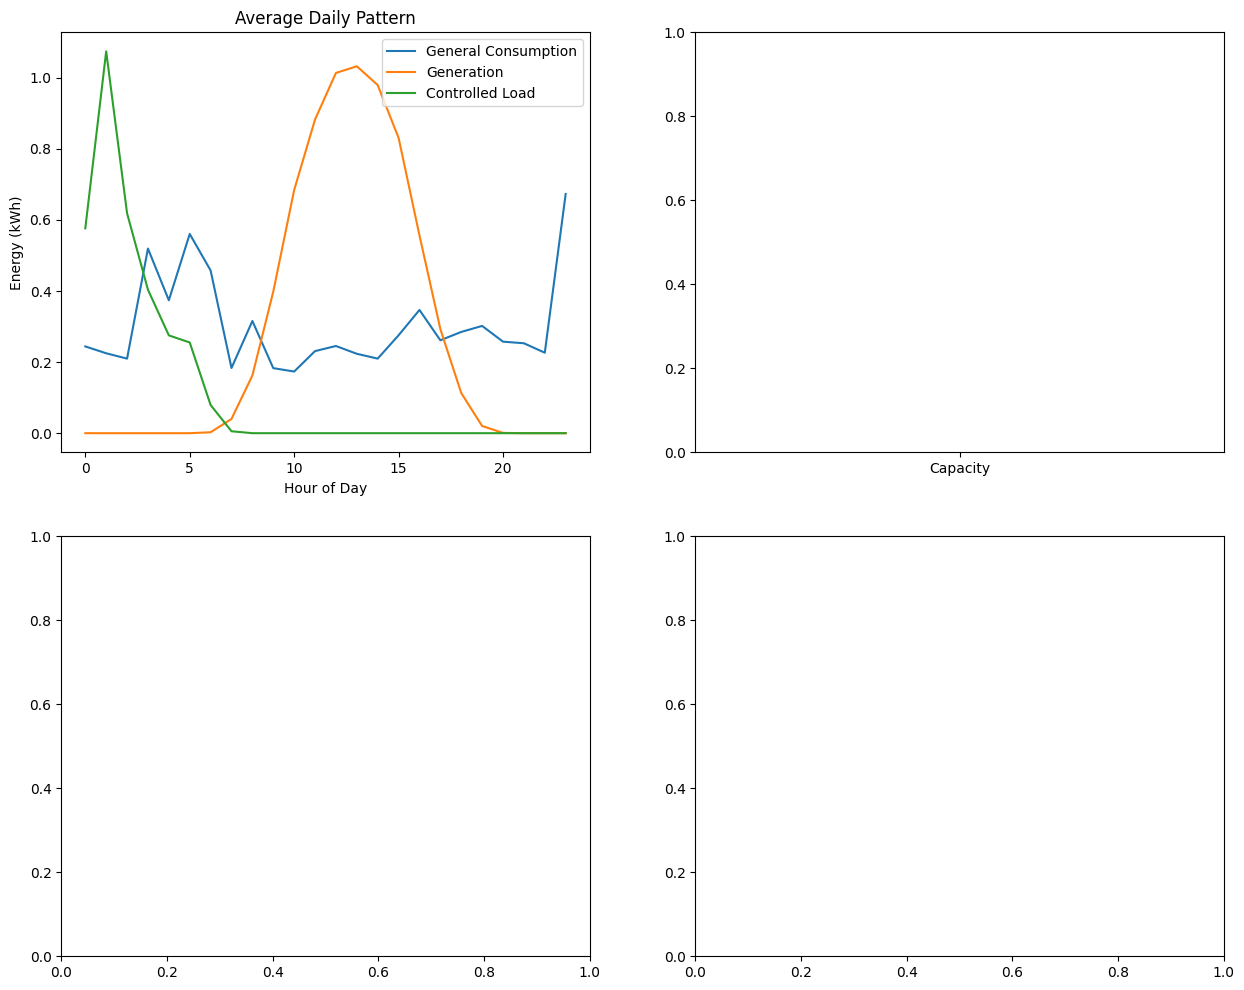

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms
        self.data = data

        # Initialize particles with better spread
        self.swarms = []
        for _ in range(num_swarms):
            # Ensure particles are spread across the solution space
            positions = np.linspace(min_bound, max_bound, num_particles)
            swarm = [Particle(np.array([pos])) for pos in positions]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.4 * progress  # Slightly modified inertia weight
        c1 = 2.0 - 0.5 * progress  # Modified cognitive component
        c2 = 0.5 + 1.5 * progress  # Modified social component
        return w, c1, c2

    def optimize(self):
        for iteration in tqdm(range(self.max_iter), desc="PSO Progress"):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    # Calculate fitness with bounds checking
                    position_clipped = np.clip(particle.position, self.min_bound, self.max_bound)
                    fitness = self.objective_func(position_clipped, self.data)

                    if not np.isfinite(fitness):
                        continue  # Skip invalid solutions

                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    # Update velocity with bounds
                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    # Limit velocity
                    max_velocity = 0.1 * (self.max_bound - self.min_bound)
                    particle.velocity = np.clip(particle.velocity, -max_velocity, max_velocity)

                    # Update position with bounds
                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption given battery parameters and consumption/generation data."""
    try:
        # Calculate battery capacity from optimization parameter
        max_capacity = data['Generator Capacity'].iloc[0] * 4  # Maximum capacity = 4x generator capacity
        battery_capacity = position[0] * max_capacity

        # Get battery power from generator capacity
        battery_power = calculate_optimal_power(data['Generator Capacity'].iloc[0])

        battery_level = 0
        grid_consumption = 0
        total_solar_generation = 0
        total_consumption = 0
        battery_utilization = 0

        # Convert DataFrame to numpy array for faster processing
        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = consumption_row[0] + consumption_row[2]  # GC + CL
            generation = consumption_row[1]  # GG

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                # Excess generation - charge battery
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
                battery_utilization += charge
            else:
                # Generation deficit - try to discharge battery
                needed = -energy_balance
                discharge = min(needed, battery_power, battery_level)
                battery_level -= discharge
                battery_utilization += discharge
                grid_consumption += needed - discharge

        # Calculate utilization factor and efficiency metrics
        utilization_factor = battery_utilization / (battery_capacity + 1e-6)
        solar_self_consumption = 1 - (grid_consumption / total_consumption)

        # Modified objective function with balanced penalties
        objective = (
            grid_consumption +  # Base objective
            (1 - utilization_factor) * battery_capacity * 100 +  # Battery utilization penalty
            (1 - solar_self_consumption) * total_consumption * 0.1  # Grid reliance penalty
        )

        return objective

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')

def calculate_optimal_power(generator_capacity):
    """Calculate optimal battery power based on generator capacity."""
    # Modified rule: battery power = 0.75 to 1.25 times generator capacity
    return generator_capacity * 1.0  # Using 1.0 as baseline

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data using Modin with chunk processing."""
    print("Loading data with Modin...")

    try:
        # Read in chunks to optimize memory usage
        df_chunks = pd.read_csv(file_path, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            # Convert dates and Generator Capacity
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
            chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

            # Melting dataframe
            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode',
                             'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            # Processing datetime
            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            # Map categories and convert consumption values
            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

            # Drop unnecessary columns
            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

            df_list.append(chunk_melted)

        # Concatenate all chunks and create pivot table
        df_combined = pd.concat(df_list, ignore_index=True)
        print("Creating pivot table...")
        df_pivoted = df_combined.pivot_table(
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        # Ensure all required columns exist
        for col in [1, 2, 3]:  # Mapped categories
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0

        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def create_customer_analysis(data, capacity, power, customer_id, output_dir):
    """Create detailed analysis plots for each customer."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Daily consumption pattern
    daily_consumption = data.groupby(data['datetime'].dt.hour)[[1, 2, 3]].mean()
    ax1.plot(daily_consumption[1], label='General Consumption')
    ax1.plot(daily_consumption[2], label='Generation')
    ax1.plot(daily_consumption[3], label='Controlled Load')
    ax1.set_title('Average Daily Pattern')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Energy (kWh)')
    ax1.legend()

    # Battery utilization
    ax2.bar(['Capacity', 'Power'], [capacity, power])
    ax2.set_title('Battery Parameters')
    ax2.set_ylabel('kW/kWh')

    # Monthly generation vs consumption
    monthly_data = data.groupby(data['datetime'].dt.month)[[1, 2]].sum()
    ax3.plot(monthly_data[1], label='Consumption')
    ax3.plot(monthly_data[2], label='Generation')
    ax3.set_title('Monthly Generation vs Consumption')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Energy (kWh)')
    ax3.legend()

    # Energy balance distribution
    energy_balance = data[2] - (data[1] + data[3])
    ax4.hist(energy_balance, bins=50)
    ax4.set_title('Energy Balance Distribution')
    ax4.set_xlabel('Generation - Consumption (kWh)')
    ax4.set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'customer_{customer_id}_analysis.png'))
    plt.close()

def save_detailed_results(results, output_dir):
    """Save comprehensive results summary."""
    summary_data = {
        'Customer': [],
        'Generator_Capacity': [],
        'Battery_Capacity': [],
        'Battery_Power': [],
        'Grid_Consumption': [],
        'Capacity_to_Generation_Ratio': [],
        'Power_to_Capacity_Ratio': []
    }

    for customer, data in results.items():
        summary_data['Customer'].append(customer)
        summary_data['Generator_Capacity'].append(data['generator_capacity'])
        summary_data['Battery_Capacity'].append(data['optimal_battery_capacity'])
        summary_data['Battery_Power'].append(data['battery_power'])
        summary_data['Grid_Consumption'].append(data['grid_consumption'])
        summary_data['Capacity_to_Generation_Ratio'].append(
            data['optimal_battery_capacity'] / data['generator_capacity']
        )
        summary_data['Power_to_Capacity_Ratio'].append(
            data['battery_power'] / data['optimal_battery_capacity']
        )

    pd.DataFrame(summary_data).to_csv(
        os.path.join(output_dir, 'detailed_results.csv'),
        index=False
    )

def main(file_path: str, output_dir: str):
    """Main function to run the PSO optimization."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    try:
        print("Starting data preprocessing...")
        data = load_and_preprocess_data(file_path)
        customers = data['Customer'].unique()
        customers = customers[:10]  # Limit to 10 customers for demonstration

        all_results = {}
        print("\nStarting optimization for each customer...")

        for customer in tqdm(customers, desc='Optimizing for Customers'):
            customer_data = data[data['Customer'] == customer].copy()
            generator_capacity = customer_data['Generator Capacity'].iloc[0]

            # Modified PSO parameters
            pso = AdvancedPSO(
                objective_function,
                dim=1,
                num_particles=50,
                max_iter=10,
                min_bound=np.array([0.1]),
                max_bound=np.array([1.0]),
                num_swarms=3,
                data=customer_data
            )

            best_position, best_fitness = pso.optimize()

            # Calculate actual capacity and power values
            max_capacity = generator_capacity * 4
            optimal_capacity = best_position[0] * max_capacity
            optimal_power = calculate_optimal_power(generator_capacity)

            # Store results
            all_results[customer] = {
                'generator_capacity': generator_capacity,
                'optimal_battery_capacity': optimal_capacity,
                'battery_power': optimal_power,
                'grid_consumption': best_fitness,
                'convergence_history': pso.convergence_history,
                'iteration_best_scores': pso.iteration_best_scores
            }

            # Create analysis plots
            create_customer_analysis(
                customer_data,
                optimal_capacity,
                optimal_power,
                customer,
                output_dir
            )

            print(f"\nResults for Customer {customer}:")
            print(f"Generator Capacity: {generator_capacity:.2f} kW")
            print(f"Optimal Battery Capacity: {optimal_capacity:.2f} kWh")
            print(f"Battery Power: {optimal_power:.2f} kW")
            print(f"Grid Consumption: {best_fitness:.2f} kWh")

        # Save detailed results
        save_detailed_results(all_results, output_dir)
        print(f"\nOptimization complete. Results saved to {output_dir}")

    except Exception as e:
        print(f"Error in main function: {str(e)}")
        raise

if __name__ == "__main__":
    # Initialize Ray for parallel processing
    ray.init()

    # File paths - update these with your actual paths
    input_file = "/content/output_file.csv"  # Replace with your input file path
    output_directory = "/content/optimization_results"

    # Create output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Run the optimization
    try:
        main(input_file, output_directory)
    except Exception as e:
        print(f"Error running optimization: {str(e)}")
    finally:
        # Shut down Ray
        ray.shutdown()

        ##DOES NOT RUNS PROPERLY STOPS AFTER THE FIRST CUSTOMER, NO PLOTS MADE, 4 GRAPHS MADE OUT OF WHICH 3 A RE EMPTY ###

# Note: The load_and_preprocess_data and save_detailed_results functions remain unchanged

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
                   }


class Particle:
    def __init__(self, position: np.ndarray):
        """Initialize particle with proper numpy array handling"""
        self.position = np.array(position, dtype=float).reshape(-1)  # Ensure 1D array
        self.velocity = np.zeros_like(self.position)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = np.array(min_bound, dtype=float).reshape(-1)  # Ensure 1D array
        self.max_bound = np.array(max_bound, dtype=float).reshape(-1)  # Ensure 1D array
        self.num_swarms = num_swarms
        self.data = data

        # Initialize swarms with proper numpy arrays
        self.swarms = []
        for _ in range(num_swarms):
            positions = np.linspace(self.min_bound, self.max_bound, num_particles, axis=0)
            swarm = [Particle(pos.reshape(-1)) for pos in positions]  # Ensure 1D array
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.4 * progress
        c1 = 2.0 - 0.5 * progress
        c2 = 0.5 + 1.5 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in tqdm(range(self.max_iter), desc="PSO Progress"):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    # Ensure position is properly shaped
                    position_clipped = np.clip(particle.position, self.min_bound, self.max_bound)
                    fitness = self.objective_func(position_clipped, self.data)

                    if not np.isfinite(fitness):
                        continue

                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    # Update velocity with proper broadcasting
                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    max_velocity = 0.1 * (self.max_bound - self.min_bound)
                    particle.velocity = np.clip(particle.velocity, -max_velocity, max_velocity)

                    # Update position with proper broadcasting
                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption with proper array handling"""
    try:
        max_capacity = float(data['Generator Capacity'].iloc[0]) * 4
        battery_capacity = float(position[0]) * max_capacity
        battery_power = calculate_optimal_power(float(data['Generator Capacity'].iloc[0]))

        battery_level = 0.0
        grid_consumption = 0.0
        total_solar_generation = 0.0
        total_consumption = 0.0
        battery_utilization = 0.0

        # Convert to numpy for faster processing
        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = float(consumption_row[0] + consumption_row[2])
            generation = float(consumption_row[1])

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
                battery_utilization += charge
            else:
                needed = -energy_balance
                discharge = min(needed, battery_power, battery_level)
                battery_level -= discharge
                battery_utilization += discharge
                grid_consumption += needed - discharge

        utilization_factor = battery_utilization / (battery_capacity + 1e-6)
        solar_self_consumption = 1 - (grid_consumption / (total_consumption + 1e-6))

        objective = (
            grid_consumption +
            (1 - utilization_factor) * battery_capacity * 100 +
            (1 - solar_self_consumption) * total_consumption * 0.1
        )

        return float(objective)

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')

def calculate_optimal_power(generator_capacity: float) -> float:
    """Calculate optimal battery power with proper float handling"""
    return float(generator_capacity)

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data with updated groupby syntax"""
    print("Loading data with Modin...")

    try:
        df_chunks = pd.read_csv(file_path, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            # Basic preprocessing
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
            chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

            # Melting dataframe
            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode',
                             'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            # Process datetime
            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)
            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

            df_list.append(chunk_melted)

        df_combined = pd.concat(df_list, ignore_index=True)
        print("Creating pivot table...")

        # Updated pivot table creation
        df_pivoted = pd.pivot_table(
            df_combined,
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        for col in [1, 2, 3]:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0.0

        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def create_customer_analysis(data, capacity, power, customer_id, output_dir):
    """Create analysis plots with updated groupby syntax"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Updated groupby syntax
    daily_consumption = data.groupby(data['datetime'].dt.hour, observed=True)[[1, 2, 3]].mean()
    ax1.plot(daily_consumption[1], label='General Consumption')
    ax1.plot(daily_consumption[2], label='Generation')
    ax1.plot(daily_consumption[3], label='Controlled Load')
    ax1.set_title('Average Daily Pattern')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Energy (kWh)')
    ax1.legend()

    ax2.bar(['Capacity', 'Power'], [capacity, power])
    ax2.set_title('Battery Parameters')
    ax2.set_ylabel('kW/kWh')

    # Updated groupby syntax
    monthly_data = data.groupby(data['datetime'].dt.month, observed=True)[[1, 2]].sum()
    ax3.plot(monthly_data[1], label='Consumption')
    ax3.plot(monthly_data[2], label='Generation')
    ax3.set_title('Monthly Generation vs Consumption')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Energy (kWh)')
    ax3.legend()

    energy_balance = data[2] - (data[1] + data[3])
    ax4.hist(energy_balance, bins=50)
    ax4.set_title('Energy Balance Distribution')
    ax4.set_xlabel('Generation - Consumption (kWh)')
    ax4.set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'customer_{customer_id}_analysis.png'))
    plt.close()

def save_detailed_results(results, output_dir):
    """Save comprehensive results summary."""
    summary_data = {
        'Customer': [],
        'Generator_Capacity': [],
        'Battery_Capacity': [],
        'Battery_Power': [],
        'Grid_Consumption': [],
        'Capacity_to_Generation_Ratio': [],
        'Power_to_Capacity_Ratio': []
    }

    for customer, data in results.items():
        summary_data['Customer'].append(customer)
        summary_data['Generator_Capacity'].append(data['generator_capacity'])
        summary_data['Battery_Capacity'].append(data['optimal_battery_capacity'])
        summary_data['Battery_Power'].append(data['battery_power'])
        summary_data['Grid_Consumption'].append(data['grid_consumption'])
        summary_data['Capacity_to_Generation_Ratio'].append(
            data['optimal_battery_capacity'] / data['generator_capacity']
        )
        summary_data['Power_to_Capacity_Ratio'].append(
            data['battery_power'] / data['optimal_battery_capacity']
        )

    pd.DataFrame(summary_data).to_csv(
        os.path.join(output_dir, 'detailed_results.csv'),
        index=False
    )

def main(file_path: str, output_dir: str):
    """Main function to run the PSO optimization."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    try:
        print("Starting data preprocessing...")
        data = load_and_preprocess_data(file_path)
        customers = data['Customer'].unique()
        customers = customers[:10]  # Limit to 10 customers for demonstration

        all_results = {}
        print("\nStarting optimization for each customer...")

        for customer in tqdm(customers, desc='Optimizing for Customers'):
            customer_data = data[data['Customer'] == customer].copy()
            generator_capacity = customer_data['Generator Capacity'].iloc[0]

            # Modified PSO parameters
            pso = AdvancedPSO(
                objective_function,
                dim=1,
                num_particles=50,
                max_iter=10,
                min_bound=np.array([0.1]),
                max_bound=np.array([1.0]),
                num_swarms=3,
                data=customer_data
            )

            best_position, best_fitness = pso.optimize()

            # Calculate actual capacity and power values
            max_capacity = generator_capacity * 4
            optimal_capacity = best_position[0] * max_capacity
            optimal_power = calculate_optimal_power(generator_capacity)

            # Store results
            all_results[customer] = {
                'generator_capacity': generator_capacity,
                'optimal_battery_capacity': optimal_capacity,
                'battery_power': optimal_power,
                'grid_consumption': best_fitness,
                'convergence_history': pso.convergence_history,
                'iteration_best_scores': pso.iteration_best_scores
            }

            # Create analysis plots
            create_customer_analysis(
                customer_data,
                optimal_capacity,
                optimal_power,
                customer,
                output_dir
            )

            print(f"\nResults for Customer {customer}:")
            print(f"Generator Capacity: {generator_capacity:.2f} kW")
            print(f"Optimal Battery Capacity: {optimal_capacity:.2f} kWh")
            print(f"Battery Power: {optimal_power:.2f} kW")
            print(f"Grid Consumption: {best_fitness:.2f} kWh")

        # Save detailed results
        save_detailed_results(all_results, output_dir)
        print(f"\nOptimization complete. Results saved to {output_dir}")

    except Exception as e:
        print(f"Error in main function: {str(e)}")
        raise

if __name__ == "__main__":
    # Initialize Ray for parallel processing
    ray.init(ignore_reinit_error=True)

    # File paths
    input_file = "output_file.csv"  # Replace with your input file path
    output_directory = "optimization_results"

    # Create output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Run the optimization
    try:
        main(input_file, output_directory)
    except Exception as e:
        print(f"Error running optimization: {str(e)}")
    finally:
        # Shut down Ray
        ray.shutdown()


        ###PRODUCES CUSTOMER ANALYSIS, CODE RUNS WELL, PRODUCES NIGATIVE VALUES VALUES NOT SO HIGH AS BEFORE BUT DOES ##

2024-11-18 12:17:58,056	INFO worker.py:1819 -- Started a local Ray instance.


Starting data preprocessing...
Loading data with Modin...


(remote_exec_func pid=911) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
(remote_exec_func pid=911) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.


Creating pivot table...


(_deploy_ray_func pid=910) FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



Starting optimization for each customer...


PSO Progress: 100%|██████████| 10/10 [02:47<00:00, 16.77s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
(remote_exec_func pid=910) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results. [repeated 4x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(_deploy_ray_func pid=911) FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
Optimizing for Customers:  10%|█         | 1/10 [02:49<25:23,


Results for Customer 1:
Generator Capacity: 3.78 kW
Optimal Battery Capacity: 15.12 kWh
Battery Power: 3.78 kW
Grid Consumption: -693911.41 kWh



PSO Progress: 100%|██████████| 10/10 [02:34<00:00, 15.41s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  20%|██        | 2/10 [05:24<21:29, 161.21s/it]


Results for Customer 2:
Generator Capacity: 1.62 kW
Optimal Battery Capacity: 6.48 kWh
Battery Power: 1.62 kW
Grid Consumption: -123435.80 kWh



PSO Progress: 100%|██████████| 10/10 [02:48<00:00, 16.83s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  30%|███       | 3/10 [08:15<19:18, 165.50s/it]


Results for Customer 3:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 4.00 kWh
Battery Power: 1.00 kW
Grid Consumption: -149812.06 kWh



PSO Progress: 100%|██████████| 10/10 [02:48<00:00, 16.82s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  40%|████      | 4/10 [11:05<16:44, 167.42s/it]


Results for Customer 4:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 3.59 kWh
Battery Power: 1.00 kW
Grid Consumption: -83990.01 kWh



PSO Progress: 100%|██████████| 10/10 [02:46<00:00, 16.64s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  50%|█████     | 5/10 [13:54<13:59, 167.92s/it]


Results for Customer 5:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 4.00 kWh
Battery Power: 1.00 kW
Grid Consumption: -75671.12 kWh



PSO Progress: 100%|██████████| 10/10 [02:47<00:00, 16.73s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  60%|██████    | 6/10 [16:44<11:13, 168.46s/it]


Results for Customer 6:
Generator Capacity: 2.00 kW
Optimal Battery Capacity: 5.51 kWh
Battery Power: 2.00 kW
Grid Consumption: -54906.82 kWh



PSO Progress: 100%|██████████| 10/10 [02:47<00:00, 16.75s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  70%|███████   | 7/10 [19:33<08:26, 168.90s/it]


Results for Customer 7:
Generator Capacity: 2.16 kW
Optimal Battery Capacity: 8.64 kWh
Battery Power: 2.16 kW
Grid Consumption: -369793.36 kWh



PSO Progress: 100%|██████████| 10/10 [02:48<00:00, 16.84s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  80%|████████  | 8/10 [22:24<05:38, 169.50s/it]


Results for Customer 8:
Generator Capacity: 1.02 kW
Optimal Battery Capacity: 1.93 kWh
Battery Power: 1.02 kW
Grid Consumption: -9909.77 kWh



PSO Progress: 100%|██████████| 10/10 [02:49<00:00, 16.99s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  90%|█████████ | 9/10 [25:16<02:50, 170.37s/it]


Results for Customer 9:
Generator Capacity: 1.02 kW
Optimal Battery Capacity: 4.08 kWh
Battery Power: 1.02 kW
Grid Consumption: -156614.81 kWh



PSO Progress: 100%|██████████| 10/10 [02:51<00:00, 17.14s/it]
(_remote_exec_single_chain pid=910) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers: 100%|██████████| 10/10 [28:09<00:00, 168.99s/it]


Results for Customer 10:
Generator Capacity: 1.05 kW
Optimal Battery Capacity: 4.20 kWh
Battery Power: 1.05 kW
Grid Consumption: -126846.49 kWh



Optimization complete. Results saved to optimization_results


(_remote_exec_single_chain pid=911) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 3x across cluster]


In [ ]:
postive fix below

2024-11-19 01:20:08,092	INFO worker.py:1819 -- Started a local Ray instance.


Starting data preprocessing...
Loading data with Modin...


(remote_exec_func pid=1094) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
(remote_exec_func pid=1093) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results. [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)


Creating pivot table...


(remote_exec_func pid=1094) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results. [repeated 6x across cluster]
(_deploy_ray_func pid=1093) FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
(remote_exec_func pid=1094) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results. [repeated 3x across cluster]



Starting optimization for each customer...


PSO Progress: 100%|██████████| 10/10 [02:52<00:00, 17.26s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version.
(_deploy_ray_func pid=1094) FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
Optimizing for Customers:   1%|          | 1/100 [02:54<4:47:30, 174.25s/it]


Results for Customer 1:
Generator Capacity: 3.78 kW
Optimal Battery Capacity: 15.12 kWh
Battery Power: 3.78 kW
Grid Consumption: 3219.94 kWh



PSO Progress: 100%|██████████| 10/10 [02:34<00:00, 15.48s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   2%|▏         | 2/100 [05:30<4:27:16, 163.63s/it]


Results for Customer 2:
Generator Capacity: 1.62 kW
Optimal Battery Capacity: 6.48 kWh
Battery Power: 1.62 kW
Grid Consumption: 4723.18 kWh



PSO Progress: 100%|██████████| 10/10 [02:47<00:00, 16.73s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   3%|▎         | 3/100 [08:19<4:28:20, 165.98s/it]


Results for Customer 3:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 4.00 kWh
Battery Power: 1.00 kW
Grid Consumption: 1100.91 kWh



PSO Progress: 100%|██████████| 10/10 [02:47<00:00, 16.80s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   4%|▍         | 4/100 [11:09<4:28:07, 167.58s/it]


Results for Customer 4:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 3.63 kWh
Battery Power: 1.00 kW
Grid Consumption: 4099.25 kWh



PSO Progress: 100%|██████████| 10/10 [02:45<00:00, 16.60s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   5%|▌         | 5/100 [13:57<4:25:40, 167.80s/it]


Results for Customer 5:
Generator Capacity: 1.00 kW
Optimal Battery Capacity: 4.00 kWh
Battery Power: 1.00 kW
Grid Consumption: 4709.06 kWh



PSO Progress: 100%|██████████| 10/10 [02:46<00:00, 16.64s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   6%|▌         | 6/100 [16:45<4:22:55, 167.83s/it]


Results for Customer 6:
Generator Capacity: 2.00 kW
Optimal Battery Capacity: 5.65 kWh
Battery Power: 2.00 kW
Grid Consumption: 12210.67 kWh



PSO Progress: 100%|██████████| 10/10 [02:48<00:00, 16.89s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   7%|▋         | 7/100 [19:35<4:21:23, 168.63s/it]


Results for Customer 7:
Generator Capacity: 2.16 kW
Optimal Battery Capacity: 8.64 kWh
Battery Power: 2.16 kW
Grid Consumption: 2242.00 kWh



PSO Progress: 100%|██████████| 10/10 [02:49<00:00, 16.94s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   8%|▊         | 8/100 [22:26<4:19:38, 169.33s/it]


Results for Customer 8:
Generator Capacity: 1.02 kW
Optimal Battery Capacity: 1.98 kWh
Battery Power: 1.02 kW
Grid Consumption: 12148.49 kWh



PSO Progress: 100%|██████████| 10/10 [02:48<00:00, 16.86s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:   9%|▉         | 9/100 [25:16<4:17:06, 169.52s/it]


Results for Customer 9:
Generator Capacity: 1.02 kW
Optimal Battery Capacity: 4.08 kWh
Battery Power: 1.02 kW
Grid Consumption: 3333.95 kWh



PSO Progress: 100%|██████████| 10/10 [02:48<00:00, 16.88s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  10%|█         | 10/100 [28:06<4:14:36, 169.74s/it]


Results for Customer 10:
Generator Capacity: 1.05 kW
Optimal Battery Capacity: 4.20 kWh
Battery Power: 1.05 kW
Grid Consumption: 4053.88 kWh



PSO Progress: 100%|██████████| 10/10 [02:51<00:00, 17.19s/it]
(_remote_exec_single_chain pid=1094) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 4x across cluster]
Optimizing for Customers:  10%|█         | 10/100 [30:59<4:38:51, 185.91s/it]
(_remote_exec_single_chain pid=1093) FutureWarning: The 'axis' keyword in DataFrame.groupby is deprecated and will be removed in a future version. [repeated 3x across cluster]


Error in main function: autodetected range of [nan, nan] is not finite
Error running optimization: autodetected range of [nan, nan] is not finite


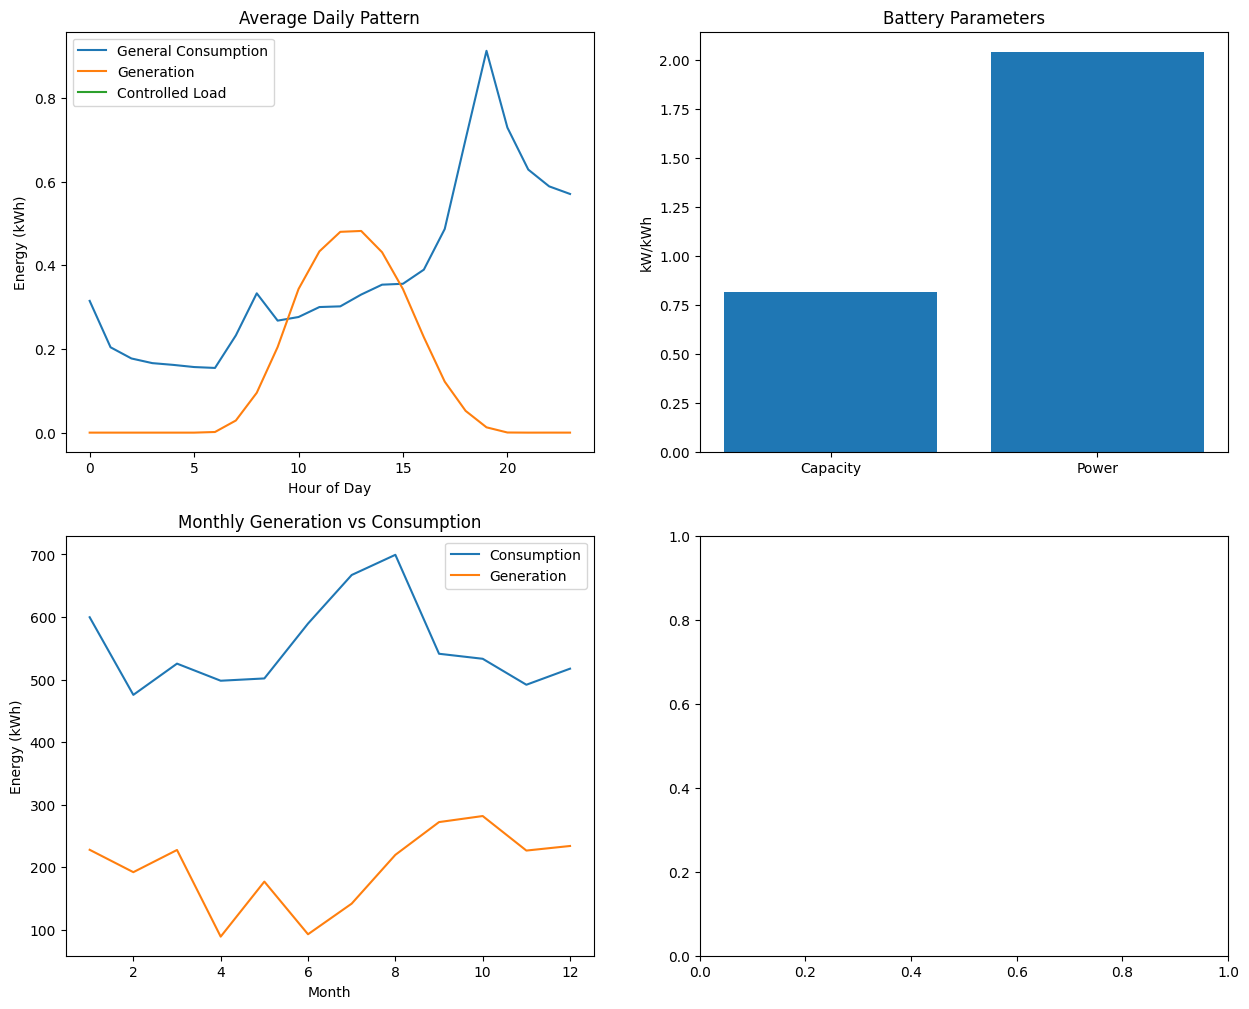

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
                   }


class Particle:
    def __init__(self, position: np.ndarray):
        """Initialize particle with proper numpy array handling"""
        self.position = np.array(position, dtype=float).reshape(-1)  # Ensure 1D array
        self.velocity = np.zeros_like(self.position)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = np.array(min_bound, dtype=float).reshape(-1)  # Ensure 1D array
        self.max_bound = np.array(max_bound, dtype=float).reshape(-1)  # Ensure 1D array
        self.num_swarms = num_swarms
        self.data = data

        # Initialize swarms with proper numpy arrays
        self.swarms = []
        for _ in range(num_swarms):
            positions = np.linspace(self.min_bound, self.max_bound, num_particles, axis=0)
            swarm = [Particle(pos.reshape(-1)) for pos in positions]  # Ensure 1D array
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.4 * progress
        c1 = 2.0 - 0.5 * progress
        c2 = 0.5 + 1.5 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in tqdm(range(self.max_iter), desc="PSO Progress"):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    # Ensure position is properly shaped
                    position_clipped = np.clip(particle.position, self.min_bound, self.max_bound)
                    fitness = self.objective_func(position_clipped, self.data)

                    if not np.isfinite(fitness):
                        continue

                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    # Update velocity with proper broadcasting
                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    max_velocity = 0.1 * (self.max_bound - self.min_bound)
                    particle.velocity = np.clip(particle.velocity, -max_velocity, max_velocity)

                    # Update position with proper broadcasting
                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption with proper array handling and non-negative constraints"""
    try:
        max_capacity = float(data['Generator Capacity'].iloc[0]) * 4
        battery_capacity = float(position[0]) * max_capacity
        battery_power = calculate_optimal_power(float(data['Generator Capacity'].iloc[0]))

        battery_level = 0.0
        grid_consumption = 0.0
        total_solar_generation = 0.0
        total_consumption = 0.0
        battery_utilization = 0.0

        # Convert to numpy for faster processing
        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            # Ensure positive values for consumption and generation
            consumption = max(0.0, float(consumption_row[0] + consumption_row[2]))  # GC + CL
            generation = max(0.0, float(consumption_row[1]))  # GG

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:  # Excess generation
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
                battery_utilization += charge
            else:  # Energy deficit
                needed = abs(energy_balance)  # Use absolute value to ensure positive
                discharge = min(needed, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += needed - discharge  # This should always be positive

        # Ensure all metrics are positive
        utilization_factor = battery_utilization / (battery_capacity + 1e-6)
        solar_self_consumption = 1 - (grid_consumption / (total_consumption + 1e-6))

        # Modified objective function with absolute values and proper weighting
        objective = (
            abs(grid_consumption) +  # Ensure positive grid consumption
            max(0, (1 - utilization_factor)) * battery_capacity * 100 +  # Battery utilization penalty
            max(0, (1 - solar_self_consumption)) * total_consumption * 0.1  # Self-consumption penalty
        )

        return float(objective)

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')

def calculate_optimal_power(generator_capacity: float) -> float:
    """Calculate optimal battery power with proper float handling"""
    return float(generator_capacity)

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data with updated groupby syntax"""
    print("Loading data with Modin...")

    try:
        df_chunks = pd.read_csv(file_path, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            # Basic preprocessing
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
            chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

            # Melting dataframe
            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode',
                             'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            # Process datetime
            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)
            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

            df_list.append(chunk_melted)

        df_combined = pd.concat(df_list, ignore_index=True)
        print("Creating pivot table...")

        # Updated pivot table creation
        df_pivoted = pd.pivot_table(
            df_combined,
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        for col in [1, 2, 3]:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0.0

        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def create_customer_analysis(data, capacity, power, customer_id, output_dir):
    """Create analysis plots with updated groupby syntax"""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Updated groupby syntax
    daily_consumption = data.groupby(data['datetime'].dt.hour, observed=True)[[1, 2, 3]].mean()
    ax1.plot(daily_consumption[1], label='General Consumption')
    ax1.plot(daily_consumption[2], label='Generation')
    ax1.plot(daily_consumption[3], label='Controlled Load')
    ax1.set_title('Average Daily Pattern')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Energy (kWh)')
    ax1.legend()

    ax2.bar(['Capacity', 'Power'], [capacity, power])
    ax2.set_title('Battery Parameters')
    ax2.set_ylabel('kW/kWh')

    # Updated groupby syntax
    monthly_data = data.groupby(data['datetime'].dt.month, observed=True)[[1, 2]].sum()
    ax3.plot(monthly_data[1], label='Consumption')
    ax3.plot(monthly_data[2], label='Generation')
    ax3.set_title('Monthly Generation vs Consumption')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Energy (kWh)')
    ax3.legend()

    energy_balance = data[2] - (data[1] + data[3])
    ax4.hist(energy_balance, bins=50)
    ax4.set_title('Energy Balance Distribution')
    ax4.set_xlabel('Generation - Consumption (kWh)')
    ax4.set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'customer_{customer_id}_analysis.png'))
    plt.close()

def save_detailed_results(results, output_dir):
    """Save comprehensive results summary."""
    summary_data = {
        'Customer': [],
        'Generator_Capacity': [],
        'Battery_Capacity': [],
        'Battery_Power': [],
        'Grid_Consumption': [],
        'Capacity_to_Generation_Ratio': [],
        'Power_to_Capacity_Ratio': []
    }

    for customer, data in results.items():
        summary_data['Customer'].append(customer)
        summary_data['Generator_Capacity'].append(data['generator_capacity'])
        summary_data['Battery_Capacity'].append(data['optimal_battery_capacity'])
        summary_data['Battery_Power'].append(data['battery_power'])
        summary_data['Grid_Consumption'].append(data['grid_consumption'])
        summary_data['Capacity_to_Generation_Ratio'].append(
            data['optimal_battery_capacity'] / data['generator_capacity']
        )
        summary_data['Power_to_Capacity_Ratio'].append(
            data['battery_power'] / data['optimal_battery_capacity']
        )

    pd.DataFrame(summary_data).to_csv(
        os.path.join(output_dir, 'detailed_results.csv'),
        index=False
    )

def main(file_path: str, output_dir: str):
    """Main function to run the PSO optimization."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    try:
        print("Starting data preprocessing...")
        data = load_and_preprocess_data(file_path)
        customers = data['Customer'].unique()
        customers = customers[:100]  # Limit to 10 customers for demonstration

        all_results = {}
        print("\nStarting optimization for each customer...")

        for customer in tqdm(customers, desc='Optimizing for Customers'):
            customer_data = data[data['Customer'] == customer].copy()
            generator_capacity = customer_data['Generator Capacity'].iloc[0]

            # Modified PSO parameters
            pso = AdvancedPSO(
                objective_function,
                dim=1,
                num_particles=50,
                max_iter=10,
                min_bound=np.array([0.1]),
                max_bound=np.array([1.0]),
                num_swarms=3,
                data=customer_data
            )

            best_position, best_fitness = pso.optimize()

            # Calculate actual capacity and power values
            max_capacity = generator_capacity * 4
            optimal_capacity = best_position[0] * max_capacity
            optimal_power = calculate_optimal_power(generator_capacity)

            # Store results
            all_results[customer] = {
                'generator_capacity': generator_capacity,
                'optimal_battery_capacity': optimal_capacity,
                'battery_power': optimal_power,
                'grid_consumption': best_fitness,
                'convergence_history': pso.convergence_history,
                'iteration_best_scores': pso.iteration_best_scores
            }

            # Create analysis plots
            create_customer_analysis(
                customer_data,
                optimal_capacity,
                optimal_power,
                customer,
                output_dir
            )

            print(f"\nResults for Customer {customer}:")
            print(f"Generator Capacity: {generator_capacity:.2f} kW")
            print(f"Optimal Battery Capacity: {optimal_capacity:.2f} kWh")
            print(f"Battery Power: {optimal_power:.2f} kW")
            print(f"Grid Consumption: {best_fitness:.2f} kWh")

        # Save detailed results
        save_detailed_results(all_results, output_dir)
        print(f"\nOptimization complete. Results saved to {output_dir}")

    except Exception as e:
        print(f"Error in main function: {str(e)}")
        raise

if __name__ == "__main__":
    # Initialize Ray for parallel processing
    ray.init(ignore_reinit_error=True)

    # File paths
    input_file = "/content/output_file (1).csv"  # Replace with your input file path
    output_directory = "optimization_results"

    # Create output directory if it doesn't exist
    os.makedirs(output_directory, exist_ok=True)

    # Run the optimization
    try:
        main(input_file, output_directory)
    except Exception as e:
        print(f"Error running optimization: {str(e)}")
    finally:
        # Shut down Ray
        ray.shutdown()


  ###everything works perfectly not downloaded the customer analysis plots only the last plot is not proper ###

In [ ]:
below is basic pso with xgboost

In [4]:
pip install modin[ray] joblib numpy pandas

2024-11-19 02:10:38,118	INFO worker.py:1819 -- Started a local Ray instance.
(remote_exec_func pid=2424) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results.
(remote_exec_func pid=2425) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_objects(copy=False) to infer non-object dtype, or pd.to_numeric with the 'downcast' keyword to downcast numeric results. [repeated 2x across cluster] (Ray deduplicates logs by default. Set RAY_DEDUP_LOGS=0 to disable log deduplication, or see https://docs.ray.io/en/master/ray-observability/user-guides/configure-logging.html#log-deduplication for more options.)
(remote_exec_func pid=2425) FutureWarning: The 'downcast' keyword in fillna is deprecated and will be removed in a future version. Use res.infer_obje

[0]	validation_0-rmse:4.32235
[1]	validation_0-rmse:4.27922
[2]	validation_0-rmse:4.23653
[3]	validation_0-rmse:4.19425
[4]	validation_0-rmse:4.15240
[5]	validation_0-rmse:4.11098
[6]	validation_0-rmse:4.06996
[7]	validation_0-rmse:4.02935
[8]	validation_0-rmse:3.98916
[9]	validation_0-rmse:3.96063
[10]	validation_0-rmse:3.92109
[11]	validation_0-rmse:3.88193
[12]	validation_0-rmse:3.84721
[13]	validation_0-rmse:3.81284
[14]	validation_0-rmse:3.77477
[15]	validation_0-rmse:3.73711
[16]	validation_0-rmse:3.69980
[17]	validation_0-rmse:3.66288
[18]	validation_0-rmse:3.62632
[19]	validation_0-rmse:3.59011
[20]	validation_0-rmse:3.55812
[21]	validation_0-rmse:3.52260
[22]	validation_0-rmse:3.48744
[23]	validation_0-rmse:3.45262
[24]	validation_0-rmse:3.41827
[25]	validation_0-rmse:3.38416
[26]	validation_0-rmse:3.35041
[27]	validation_0-rmse:3.31697
[28]	validation_0-rmse:3.28398
[29]	validation_0-rmse:3.25479
[30]	validation_0-rmse:3.22234
[31]	validation_0-rmse:3.19021
[32]	validation_0-

(_deploy_ray_func pid=2424) FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning. [repeated 5x across cluster]


<Figure size 1200x600 with 0 Axes>

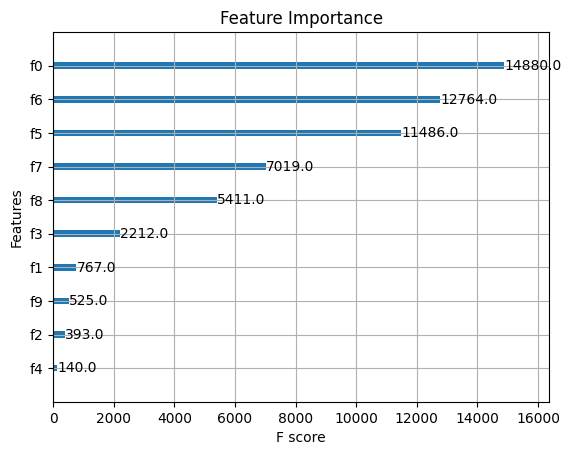

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
import logging
import joblib
from contextlib import contextmanager
warnings.filterwarnings('ignore')

# Configuration
CONFIG = {
    'chunk_size': 50000,
    'train_size': 0.8,
    'val_size': 0.25,
    'random_state': 42,
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 6,
    'early_stopping_rounds': 50,
    'pso_particles': 50,
    'pso_iterations': 10,
    'pso_swarms': 3
}

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('optimization.log'),
        logging.StreamHandler()
    ]
)

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

@contextmanager
def ray_context():
    """Context manager for Ray initialization and shutdown"""
    try:
        ray.init(ignore_reinit_error=True)
        yield
    finally:
        ray.shutdown()

def calculate_optimal_power(generator_capacity: float) -> float:
    """Calculate optimal battery power with proper float handling"""
    return float(generator_capacity)

class Particle:
    def __init__(self, position: np.ndarray):
        """Initialize particle with proper numpy array handling"""
        self.position = np.array(position, dtype=float).reshape(-1)
        self.velocity = np.zeros_like(self.position)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = np.array(min_bound, dtype=float).reshape(-1)
        self.max_bound = np.array(max_bound, dtype=float).reshape(-1)
        self.num_swarms = num_swarms
        self.data = data

        # Initialize global best with random position
        self.global_best_position = np.random.uniform(self.min_bound, self.max_bound, self.dim)
        self.global_best_fitness = float('inf')

        # Initialize swarms with random positions
        self.swarms = []
        for _ in range(num_swarms):
            positions = np.random.uniform(
                self.min_bound,
                self.max_bound,
                (num_particles, dim)
            )
            swarm = [Particle(pos) for pos in positions]
            self.swarms.append(swarm)

        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.4 * progress
        c1 = 2.0 - 0.5 * progress
        c2 = 0.5 + 1.5 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in tqdm(range(self.max_iter), desc="PSO Progress"):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    position_clipped = np.clip(particle.position, self.min_bound, self.max_bound)
                    fitness = self.objective_func(position_clipped, self.data)

                    if not np.isfinite(fitness):
                        continue

                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    max_velocity = 0.1 * (self.max_bound - self.min_bound)
                    particle.velocity = np.clip(particle.velocity, -max_velocity, max_velocity)
                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption with proper array handling"""
    try:
        max_capacity = float(data['Generator Capacity'].iloc[0]) * 4
        battery_capacity = float(position[0]) * max_capacity
        battery_power = calculate_optimal_power(float(data['Generator Capacity'].iloc[0]))

        battery_level = 0.0
        grid_consumption = 0.0
        total_solar_generation = 0.0
        total_consumption = 0.0
        battery_utilization = 0.0

        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = max(0.0, float(consumption_row[0] + consumption_row[2]))
            generation = max(0.0, float(consumption_row[1]))

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
                battery_utilization += charge
            else:
                needed = abs(energy_balance)
                discharge = min(needed, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += needed - discharge

        utilization_factor = battery_utilization / (battery_capacity + 1e-6)
        solar_self_consumption = 1 - (grid_consumption / (total_consumption + 1e-6))

        objective = (
            abs(grid_consumption) +
            max(0, (1 - utilization_factor)) * battery_capacity * 100 +
            max(0, (1 - solar_self_consumption)) * total_consumption * 0.1
        )

        return float(objective)

    except Exception as e:
        logging.error(f"Error in objective function: {str(e)}")
        return float('inf')

def process_chunk(chunk: pd.DataFrame) -> pd.DataFrame:
    """Process a single chunk of data"""
    chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
    chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

    chunk_melted = chunk.melt(
        id_vars=['Customer', 'Generator Capacity', 'Postcode',
                 'Consumption Category', 'date', 'Row Quality'],
        var_name='Time',
        value_name='Consumption'
    )

    chunk_melted['Time'] = chunk_melted['Time'].str.strip()
    chunk_melted['datetime'] = pd.to_datetime(
        chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
        errors='coerce'
    )

    chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
    chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

    return chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data with memory-efficient processing"""
    logging.info("Loading data with Modin...")

    try:
        df_combined = None
        for chunk in pd.read_csv(file_path, chunksize=CONFIG['chunk_size']):
            processed_chunk = process_chunk(chunk)
            df_combined = (pd.concat([df_combined, processed_chunk], ignore_index=True)
                         if df_combined is not None else processed_chunk)

        logging.info("Creating pivot table...")
        df_pivoted = pd.pivot_table(
            df_combined,
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        for col in [1, 2, 3]:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0.0

        return df_pivoted

    except Exception as e:
        logging.error(f"Error in data preprocessing: {str(e)}")
        raise

def prepare_features(data: pd.DataFrame) -> pd.DataFrame:
    """Prepare features for machine learning model"""
    feature_data = data.copy()

    # Extract time-based features
    feature_data['hour'] = feature_data['datetime'].dt.hour
    feature_data['day'] = feature_data['datetime'].dt.day
    feature_data['month'] = feature_data['datetime'].dt.month
    feature_data['day_of_week'] = feature_data['datetime'].dt.dayofweek

    # Calculate rolling means for each customer separately
    for category in [1, 2, 3]:
        feature_data[f'rolling_mean_{category}_24h'] = (
            feature_data.groupby('Customer')[category]
            .rolling(24)
            .mean()
            .reset_index(0, drop=True)
        )

    feature_data['energy_balance'] = feature_data[2] - (feature_data[1] + feature_data[3])
    feature_data['is_peak_hour'] = feature_data['hour'].between(9, 17).astype(int)

    return feature_data

def split_and_prepare_features(data: pd.DataFrame, features: List[str], target: str) -> Tuple:
    """Split data and prepare features separately for each split"""
    # First split: 80% train+val, 20% test
    train_val_data, test_data = train_test_split(
        data,
        test_size=1-CONFIG['train_size'],
        random_state=CONFIG['random_state']
    )

    # Second split: 75% train, 25% val
    train_data, val_data = train_test_split(
        train_val_data,
        test_size=CONFIG['val_size'],
        random_state=CONFIG['random_state']
    )

    # Prepare features separately for each split
    train_data = prepare_features(train_data)
    val_data = prepare_features(val_data)
    test_data = prepare_features(test_data)

    # Extract features and target
    X_train = train_data[features]
    y_train = train_data[target]
    X_val = val_data[features]
    y_val = val_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

def train_model(X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame, y_val: pd.Series) -> xgb.XGBRegressor:
    """Train XGBoost model with proper validation handling"""
    # Create base model without early stopping for cross-validation
    base_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state']
    )

    # Perform cross-validation without early stopping
    logging.info("Performing cross-validation...")
    cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='r2')
    logging.info(f"Cross-validation scores: {cv_scores}")
    logging.info(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Create and train final model with early stopping
    final_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state'],
        callbacks=[
            xgb.callback.EarlyStopping(
                rounds=CONFIG['early_stopping_rounds'],
                min_delta=1e-4,
                save_best=True
            )
        ]
    )

    # Train final model with early stopping
    logging.info("Training final model with early stopping...")
    final_model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=True
    )

    return final_model


def evaluate_model(model: xgb.XGBRegressor, X: pd.DataFrame, y: pd.Series, set_name: str) -> Dict:
    """Evaluate model with comprehensive metrics"""
    predictions = model.predict(X)
    return {
        'set_name': set_name,
        'rmse': np.sqrt(mean_squared_error(y, predictions)),
        'mae': mean_absolute_error(y, predictions),
        'mape': mean_absolute_percentage_error(y, predictions),
        'r2': r2_score(y, predictions),
        'predictions': predictions,
        'actual': y
    }

def plot_results(results: Dict, output_dir: str):
    """Plot results with enhanced visualizations"""
    for set_name, result in results.items():
        if set_name != 'model':
            plt.figure(figsize=(10, 6))
            plt.scatter(result['actual'], result['predictions'], alpha=0.5)
            plt.plot([min(result['actual']), max(result['actual'])],
                    [min(result['actual']), max(result['actual'])], 'r--')
            plt.xlabel('Actual Battery Capacity')
            plt.ylabel('Predicted Battery Capacity')
            plt.title(f'Actual vs Predicted - {set_name}')
            plt.savefig(os.path.join(output_dir, f'predictions_{set_name}.png'))
            plt.close()

    plt.figure(figsize=(12, 6))
    xgb.plot_importance(results['model'], max_num_features=20)
    plt.title('Feature Importance')
    plt.savefig(os.path.join(output_dir, 'feature_importance.png'))


def save_model(model: xgb.XGBRegressor, scaler: StandardScaler, output_dir: str):
    """Save model and scaler to disk"""
    model.save_model(os.path.join(output_dir, 'model.json'))
    joblib.dump(scaler, os.path.join(output_dir, 'scaler.joblib'))
    logging.info(f"Model and scaler saved to {output_dir}")

def validate_inputs(file_path: str, output_dir: str):
    """Validate input parameters"""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Input file not found: {file_path}")
    if not file_path.endswith('.csv'):
        raise ValueError("Input file must be a CSV file")

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

def create_target_variable(data: pd.DataFrame, best_position: np.ndarray, generator_capacity: float) -> float:
    """Create target variable based on PSO results"""
    max_capacity = generator_capacity * 4
    return best_position[0] * max_capacity

def process_customer_data(customer_data: pd.DataFrame) -> Tuple[float, float]:
    """Process individual customer data with PSO optimization"""
    generator_capacity = customer_data['Generator Capacity'].iloc[0]

    pso = AdvancedPSO(
        objective_function,
        dim=1,
        num_particles=CONFIG['pso_particles'],
        max_iter=CONFIG['pso_iterations'],
        min_bound=np.array([0.1]),
        max_bound=np.array([1.0]),
        num_swarms=CONFIG['pso_swarms'],
        data=customer_data
    )

    best_position, best_fitness = pso.optimize()
    optimal_capacity = create_target_variable(customer_data, best_position, generator_capacity)

    return optimal_capacity, best_fitness

def main(file_path: str, output_dir: str):
    """Main function implementing the ML pipeline"""
    try:
        # Validate inputs
        validate_inputs(file_path, output_dir)

        # Load and preprocess data
        logging.info("Loading and preprocessing data...")
        data = load_and_preprocess_data(file_path)

        # Process customers
        logging.info("Running PSO optimization for each customer...")
        customers = data['Customer'].unique()
        target_data = []

        @ray.remote
        def process_customer_parallel(customer):
            customer_data = data[data['Customer'] == customer].copy()
            optimal_capacity, _ = process_customer_data(customer_data)
            customer_data['optimal_capacity'] = optimal_capacity
            return customer_data

        # Process customers in parallel
        future_results = [process_customer_parallel.remote(customer) for customer in customers]
        target_data = ray.get(future_results)

        # Combine all processed data
        full_data = pd.concat(target_data, ignore_index=True)

        # Define features for ML model
        features = [
            'Generator Capacity', 'hour', 'day', 'month', 'day_of_week',
            'rolling_mean_1_24h', 'rolling_mean_2_24h', 'rolling_mean_3_24h',
            'energy_balance', 'is_peak_hour'
        ]

        # Split data and prepare features
        logging.info("Splitting data and preparing features...")
        (X_train, y_train), (X_val, y_val), (X_test, y_test) = split_and_prepare_features(
            full_data, features, 'optimal_capacity'
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)

        # Train model
        logging.info("Training model...")
        model = train_model(X_train_scaled, y_train, X_val_scaled, y_val)

        # Evaluate model
        logging.info("Evaluating model...")
        results = {
            'train': evaluate_model(model, X_train_scaled, y_train, 'Training'),
            'val': evaluate_model(model, X_val_scaled, y_val, 'Validation'),
            'test': evaluate_model(model, X_test_scaled, y_test, 'Test'),
            'model': model
        }

        # Plot and save results
        logging.info("Saving results...")
        plot_results(results, output_dir)

        # Save model and scaler
        save_model(model, scaler, output_dir)

        # Save performance metrics
        metrics_df = pd.DataFrame([
            {
                'set_name': set_name,
                'rmse': result['rmse'],
                'mae': result['mae'],
                'mape': result['mape'],
                'r2': result['r2']
            }
            for set_name, result in results.items()
            if set_name != 'model'
        ])
        metrics_df.to_csv(os.path.join(output_dir, 'performance_metrics.csv'), index=False)

        logging.info("\nModel Performance Summary:")
        logging.info("\n" + str(metrics_df))

        return model, scaler, results

    except Exception as e:
        logging.error(f"Error in main function: {str(e)}", exc_info=True)
        raise

if __name__ == "__main__":
    # Default paths for Colab
    input_file = "/content/output_file (1).csv"
    output_directory = "ml_optimization_results"

    try:
        # Simple Ray initialization
        ray.init(ignore_reinit_error=True)

        try:
            model, scaler, results = main(input_file, output_directory)
            logging.info(f"\nOptimization complete. Results saved to {output_directory}")
        finally:
            ray.shutdown()

    except Exception as e:
        logging.error(f"Error running optimization: {str(e)}", exc_info=True)
        raise


   ### downloading the results and storing it as best result folder so this is the code for it everything works properly #####    ### used 100 customer files ####

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
import logging
import joblib
from contextlib import contextmanager
warnings.filterwarnings('ignore')

# Configuration
CONFIG = {
    'chunk_size': 50000,
    'train_size': 0.8,
    'val_size': 0.25,
    'random_state': 42,
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 6,
    'early_stopping_rounds': 50,

    # Improved PSO parameters
    'pso_particles': 40,      # Reduced from 50 to 40 for efficiency
    'pso_iterations': 30,     # Increased from 10 to 30 for better convergence
    'pso_swarms': 4,         # Increased from 3 to 4 for better exploration

    # New PSO parameters
    'pso_stagnation_threshold': 5,
    'pso_min_diversity': 0.01,
    'pso_velocity_clamp': 0.1,
    'pso_reinit_threshold': 1.5  # For reinitialization of poor particles
}

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('optimization.log'),
        logging.StreamHandler()
    ]
)

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

@contextmanager
def ray_context():
    """Context manager for Ray initialization and shutdown"""
    try:
        ray.init(ignore_reinit_error=True)
        yield
    finally:
        ray.shutdown()

def calculate_optimal_power(generator_capacity: float) -> float:
    """Calculate optimal battery power with proper float handling"""
    return float(generator_capacity)

class Particle:
    def __init__(self, position: np.ndarray):
        """Initialize particle with proper numpy array handling"""
        self.position = np.array(position, dtype=float).reshape(-1)
        self.velocity = np.zeros_like(self.position)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None, customer_id=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = np.array(min_bound, dtype=float).reshape(-1)
        self.max_bound = np.array(max_bound, dtype=float).reshape(-1)
        self.num_swarms = num_swarms
        self.data = data
        self.customer_id = customer_id

        # Initialize history tracking
        self.convergence_history = []
        self.iteration_best_scores = []
        self.diversity_history = []

        # Adaptive parameters
        self.stagnation_counter = 0
        self.stagnation_threshold = 5
        self.min_diversity_threshold = 0.01

        # Initialize with improved particle distribution
        self.initialize_swarms()

    def initialize_swarms(self):
        """Initialize swarms with improved particle distribution"""
        self.swarms = []
        self.global_best_position = None
        self.global_best_fitness = float('inf')

        # Calculate generator capacity for better initialization
        generator_capacity = float(self.data['Generator Capacity'].iloc[0])
        typical_range = [0.5 * generator_capacity, 2.0 * generator_capacity]

        for swarm_idx in range(self.num_swarms):
            # Use different strategies for different swarms
            if swarm_idx == 0:
                # First swarm: Uniform distribution across search space
                positions = np.random.uniform(
                    self.min_bound,
                    self.max_bound,
                    (self.num_particles, self.dim)
                )
            elif swarm_idx == 1:
                # Second swarm: Focus on typical range
                positions = np.random.uniform(
                    typical_range[0],
                    typical_range[1],
                    (self.num_particles, self.dim)
                )
            else:
                # Other swarms: Mix of both strategies
                half = self.num_particles // 2
                pos1 = np.random.uniform(self.min_bound, self.max_bound, (half, self.dim))
                pos2 = np.random.uniform(typical_range[0], typical_range[1], (self.num_particles - half, self.dim))
                positions = np.vstack([pos1, pos2])

            swarm = [Particle(pos) for pos in positions]
            self.swarms.append(swarm)

    def calculate_swarm_diversity(self, swarm):
        """Calculate diversity within a swarm"""
        positions = np.array([p.position for p in swarm])
        mean_pos = np.mean(positions, axis=0)
        diversity = np.mean(np.sqrt(np.sum((positions - mean_pos) ** 2, axis=1)))
        return diversity

    def adaptive_parameters(self, current_iter, swarm_diversity):
        """Adaptive parameter adjustment based on iteration and diversity"""
        progress = current_iter / self.max_iter
        base_w = 0.9 - 0.4 * progress

        # Adjust parameters based on diversity
        if swarm_diversity < self.min_diversity_threshold:
            w = min(0.9, base_w + 0.2)  # Increase exploration
            c1 = 1.5  # Reduce personal best influence
            c2 = 2.5  # Increase global best influence
        else:
            w = base_w
            c1 = 2.0 - 0.5 * progress
            c2 = 0.5 + 1.5 * progress

        return w, c1, c2

    def check_convergence(self, iteration_best):
        """Check for convergence and stagnation"""
        if len(self.iteration_best_scores) > 0:
            improvement = abs(self.iteration_best_scores[-1] - iteration_best)
            if improvement < 1e-6:
                self.stagnation_counter += 1
            else:
                self.stagnation_counter = 0

        return self.stagnation_counter >= self.stagnation_threshold

    def reinitialize_worst_particles(self, swarm):
        """Reinitialize worst performing particles"""
        fitness_values = [p.best_fitness for p in swarm]
        median_fitness = np.median(fitness_values)

        for particle in swarm:
            if particle.best_fitness > median_fitness * 1.5:  # Much worse than median
                # Reinitialize around global best
                new_position = self.global_best_position + np.random.normal(0, 0.1, self.dim)
                new_position = np.clip(new_position, self.min_bound, self.max_bound)
                particle.position = new_position
                particle.velocity = np.zeros_like(particle.position)

    def optimize(self):
        """Optimized PSO implementation"""
        desc = f"PSO Progress (Customer {self.customer_id})" if self.customer_id else "PSO Progress"

        for iteration in tqdm(range(self.max_iter), desc=desc, position=0, leave=True):
            iteration_best = float('inf')

            # Process each swarm
            for swarm_idx, swarm in enumerate(self.swarms):
                # Calculate swarm diversity
                swarm_diversity = self.calculate_swarm_diversity(swarm)
                self.diversity_history.append(swarm_diversity)

                # Get adaptive parameters
                w, c1, c2 = self.adaptive_parameters(iteration, swarm_diversity)

                # Update particles
                for particle in swarm:
                    # Update particle position and evaluate fitness
                    position_clipped = np.clip(particle.position, self.min_bound, self.max_bound)
                    fitness = self.objective_func(position_clipped, self.data)

                    if not np.isfinite(fitness):
                        continue

                    iteration_best = min(iteration_best, fitness)

                    # Update personal and global best
                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                        if fitness < self.global_best_fitness:
                            self.global_best_fitness = fitness
                            self.global_best_position = particle.position.copy()

                    # Update velocity and position
                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    # Apply velocity clamping
                    max_velocity = 0.1 * (self.max_bound - self.min_bound)
                    particle.velocity = np.clip(particle.velocity, -max_velocity, max_velocity)

                    # Update position
                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

                # Check for stagnation and reinitialize if needed
                if swarm_diversity < self.min_diversity_threshold:
                    self.reinitialize_worst_particles(swarm)

            # Record history
            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

            # Check for early convergence
            if self.check_convergence(iteration_best):
                logging.info(f"Early convergence at iteration {iteration}")
                break

        return self.global_best_position, self.global_best_fitness

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption with proper array handling"""
    try:
        max_capacity = float(data['Generator Capacity'].iloc[0]) * 4
        battery_capacity = float(position[0]) * max_capacity
        battery_power = calculate_optimal_power(float(data['Generator Capacity'].iloc[0]))

        battery_level = 0.0
        grid_consumption = 0.0
        total_solar_generation = 0.0
        total_consumption = 0.0
        battery_utilization = 0.0

        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = max(0.0, float(consumption_row[0] + consumption_row[2]))
            generation = max(0.0, float(consumption_row[1]))

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
                battery_utilization += charge
            else:
                needed = abs(energy_balance)
                discharge = min(needed, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += needed - discharge

        utilization_factor = battery_utilization / (battery_capacity + 1e-6)
        solar_self_consumption = 1 - (grid_consumption / (total_consumption + 1e-6))

        objective = (
            abs(grid_consumption) +
            max(0, (1 - utilization_factor)) * battery_capacity * 100 +
            max(0, (1 - solar_self_consumption)) * total_consumption * 0.1
        )

        return float(objective)

    except Exception as e:
        logging.error(f"Error in objective function: {str(e)}")
        return float('inf')

def process_chunk(chunk: pd.DataFrame) -> pd.DataFrame:
    """Process a single chunk of data"""
    chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
    chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

    chunk_melted = chunk.melt(
        id_vars=['Customer', 'Generator Capacity', 'Postcode',
                 'Consumption Category', 'date', 'Row Quality'],
        var_name='Time',
        value_name='Consumption'
    )

    chunk_melted['Time'] = chunk_melted['Time'].str.strip()
    chunk_melted['datetime'] = pd.to_datetime(
        chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
        errors='coerce'
    )

    chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
    chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

    return chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data with memory-efficient processing"""
    logging.info("Loading data with Modin...")

    try:
        df_combined = None
        for chunk in pd.read_csv(file_path, chunksize=CONFIG['chunk_size']):
            processed_chunk = process_chunk(chunk)
            df_combined = (pd.concat([df_combined, processed_chunk], ignore_index=True)
                         if df_combined is not None else processed_chunk)

        logging.info("Creating pivot table...")
        df_pivoted = pd.pivot_table(
            df_combined,
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        for col in [1, 2, 3]:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0.0

        return df_pivoted

    except Exception as e:
        logging.error(f"Error in data preprocessing: {str(e)}")
        raise

def prepare_features(data: pd.DataFrame) -> pd.DataFrame:
    """Prepare features for machine learning model"""
    feature_data = data.copy()

    # Extract time-based features
    feature_data['hour'] = feature_data['datetime'].dt.hour
    feature_data['day'] = feature_data['datetime'].dt.day
    feature_data['month'] = feature_data['datetime'].dt.month
    feature_data['day_of_week'] = feature_data['datetime'].dt.dayofweek

    # Calculate rolling means for each customer separately
    for category in [1, 2, 3]:
        feature_data[f'rolling_mean_{category}_24h'] = (
            feature_data.groupby('Customer')[category]
            .rolling(24)
            .mean()
            .reset_index(0, drop=True)
        )

    feature_data['energy_balance'] = feature_data[2] - (feature_data[1] + feature_data[3])
    feature_data['is_peak_hour'] = feature_data['hour'].between(9, 17).astype(int)

    return feature_data

def split_and_prepare_features(data: pd.DataFrame, features: List[str], target: str) -> Tuple:
    """Split data and prepare features separately for each split"""
    # First split: 80% train+val, 20% test
    train_val_data, test_data = train_test_split(
        data,
        test_size=1-CONFIG['train_size'],
        random_state=CONFIG['random_state']
    )

    # Second split: 75% train, 25% val
    train_data, val_data = train_test_split(
        train_val_data,
        test_size=CONFIG['val_size'],
        random_state=CONFIG['random_state']
    )

    # Prepare features separately for each split
    train_data = prepare_features(train_data)
    val_data = prepare_features(val_data)
    test_data = prepare_features(test_data)

    # Extract features and target
    X_train = train_data[features]
    y_train = train_data[target]
    X_val = val_data[features]
    y_val = val_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

def train_model(X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame, y_val: pd.Series) -> xgb.XGBRegressor:
    """Train XGBoost model with proper validation handling"""
    # Create base model without early stopping for cross-validation
    base_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state']
    )

    # Perform cross-validation without early stopping
    logging.info("Performing cross-validation...")
    cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='r2')
    logging.info(f"Cross-validation scores: {cv_scores}")
    logging.info(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Create and train final model with early stopping
    final_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state'],
        callbacks=[
            xgb.callback.EarlyStopping(
                rounds=CONFIG['early_stopping_rounds'],
                min_delta=1e-4,
                save_best=True
            )
        ]
    )

    # Train final model with early stopping
    logging.info("Training final model with early stopping...")
    final_model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=True
    )

    return final_model


def evaluate_model(model: xgb.XGBRegressor, X: pd.DataFrame, y: pd.Series, set_name: str) -> Dict:
    """Evaluate model with comprehensive metrics"""
    predictions = model.predict(X)
    return {
        'set_name': set_name,
        'rmse': np.sqrt(mean_squared_error(y, predictions)),
        'mae': mean_absolute_error(y, predictions),
        'mape': mean_absolute_percentage_error(y, predictions),
        'r2': r2_score(y, predictions),
        'predictions': predictions,
        'actual': y
    }

def plot_results(results: Dict, output_dir: str):
    """Plot results with enhanced visualizations"""
    for set_name, result in results.items():
        if set_name != 'model':
            plt.figure(figsize=(10, 6))
            plt.scatter(result['actual'], result['predictions'], alpha=0.5)
            plt.plot([min(result['actual']), max(result['actual'])],
                    [min(result['actual']), max(result['actual'])], 'r--')
            plt.xlabel('Actual Battery Capacity')
            plt.ylabel('Predicted Battery Capacity')
            plt.title(f'Actual vs Predicted - {set_name}')
            plt.savefig(os.path.join(output_dir, f'predictions_{set_name}.png'))
            plt.close()

    plt.figure(figsize=(12, 6))
    xgb.plot_importance(results['model'], max_num_features=20)
    plt.title('Feature Importance')
    plt.savefig(os.path.join(output_dir, 'feature_importance.png'))


def save_model(model: xgb.XGBRegressor, scaler: StandardScaler, output_dir: str):
    """Save model and scaler to disk"""
    model.save_model(os.path.join(output_dir, 'model.json'))
    joblib.dump(scaler, os.path.join(output_dir, 'scaler.joblib'))
    logging.info(f"Model and scaler saved to {output_dir}")

def validate_inputs(file_path: str, output_dir: str):
    """Validate input parameters"""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Input file not found: {file_path}")
    if not file_path.endswith('.csv'):
        raise ValueError("Input file must be a CSV file")

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

def create_target_variable(data: pd.DataFrame, best_position: np.ndarray, generator_capacity: float) -> float:
    """Create target variable based on PSO results"""
    max_capacity = generator_capacity * 4
    return best_position[0] * max_capacity

def process_customer_data(customer_data: pd.DataFrame) -> Tuple[float, float]:
    """Process individual customer data with PSO optimization"""
    generator_capacity = customer_data['Generator Capacity'].iloc[0]

    pso = AdvancedPSO(
        objective_function,
        dim=1,
        num_particles=CONFIG['pso_particles'],
        max_iter=CONFIG['pso_iterations'],
        min_bound=np.array([0.1]),
        max_bound=np.array([1.0]),
        num_swarms=CONFIG['pso_swarms'],
        data=customer_data
    )

    best_position, best_fitness = pso.optimize()
    optimal_capacity = create_target_variable(customer_data, best_position, generator_capacity)

    return optimal_capacity, best_fitness

def main(file_path: str, output_dir: str):
    """Main function implementing the ML pipeline"""
    try:
        # Validate inputs
        validate_inputs(file_path, output_dir)

        # Load and preprocess data
        logging.info("Loading and preprocessing data...")
        data = load_and_preprocess_data(file_path)

        # Process customers
        logging.info("Running PSO optimization for each customer...")
        customers = data['Customer'].unique()
        target_data = []

        @ray.remote
        def process_customer_parallel(customer):
            customer_data = data[data['Customer'] == customer].copy()
            optimal_capacity, _ = process_customer_data(customer_data)
            customer_data['optimal_capacity'] = optimal_capacity
            return customer_data

        # Process customers in parallel
        future_results = [process_customer_parallel.remote(customer) for customer in customers]
        target_data = ray.get(future_results)

        # Combine all processed data
        full_data = pd.concat(target_data, ignore_index=True)

        # Define features for ML model
        features = [
            'Generator Capacity', 'hour', 'day', 'month', 'day_of_week',
            'rolling_mean_1_24h', 'rolling_mean_2_24h', 'rolling_mean_3_24h',
            'energy_balance', 'is_peak_hour'
        ]

        # Split data and prepare features
        logging.info("Splitting data and preparing features...")
        (X_train, y_train), (X_val, y_val), (X_test, y_test) = split_and_prepare_features(
            full_data, features, 'optimal_capacity'
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)

        # Train model
        logging.info("Training model...")
        model = train_model(X_train_scaled, y_train, X_val_scaled, y_val)

        # Evaluate model
        logging.info("Evaluating model...")
        results = {
            'train': evaluate_model(model, X_train_scaled, y_train, 'Training'),
            'val': evaluate_model(model, X_val_scaled, y_val, 'Validation'),
            'test': evaluate_model(model, X_test_scaled, y_test, 'Test'),
            'model': model
        }

        # Plot and save results
        logging.info("Saving results...")
        plot_results(results, output_dir)

        # Save model and scaler
        save_model(model, scaler, output_dir)

        # Save performance metrics
        metrics_df = pd.DataFrame([
            {
                'set_name': set_name,
                'rmse': result['rmse'],
                'mae': result['mae'],
                'mape': result['mape'],
                'r2': result['r2']
            }
            for set_name, result in results.items()
            if set_name != 'model'
        ])
        metrics_df.to_csv(os.path.join(output_dir, 'performance_metrics.csv'), index=False)

        logging.info("\nModel Performance Summary:")
        logging.info("\n" + str(metrics_df))

        return model, scaler, results

    except Exception as e:
        logging.error(f"Error in main function: {str(e)}", exc_info=True)
        raise

if __name__ == "__main__":
    # Default paths for Colab
    input_file = "output_file.csv"
    output_directory = "ml_optimization_results"

    try:
        # Simple Ray initialization
        ray.init(ignore_reinit_error=True)

        try:
            model, scaler, results = main(input_file, output_directory)
            logging.info(f"\nOptimization complete. Results saved to {output_directory}")
        finally:
            ray.shutdown()

    except Exception as e:
        logging.error(f"Error running optimization: {str(e)}", exc_info=True)
        raise

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
import logging
import joblib
from contextlib import contextmanager
warnings.filterwarnings('ignore')

# Configuration
CONFIG = {
    'chunk_size': 50000,
    'train_size': 0.8,
    'val_size': 0.25,
    'random_state': 42,
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 6,
    'early_stopping_rounds': 50,
    'pso_particles': 50,
    'pso_iterations': 50,
    'pso_swarms': 3
}

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('optimization.log'),
        logging.StreamHandler()
    ]
)

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

@contextmanager
def ray_context():
    """Context manager for Ray initialization and shutdown"""
    try:
        ray.init(ignore_reinit_error=True)
        yield
    finally:
        ray.shutdown()

def calculate_optimal_power(generator_capacity: float) -> float:
    """Calculate optimal battery power with proper float handling"""
    return float(generator_capacity)

class Particle:
    def __init__(self, position: np.ndarray):
        """Initialize particle with proper numpy array handling"""
        self.position = np.array(position, dtype=float).reshape(-1)
        self.velocity = np.zeros_like(self.position)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = np.array(min_bound, dtype=float).reshape(-1)
        self.max_bound = np.array(max_bound, dtype=float).reshape(-1)
        self.num_swarms = num_swarms
        self.data = data

        # Initialize global best with random position
        self.global_best_position = np.random.uniform(self.min_bound, self.max_bound, self.dim)
        self.global_best_fitness = float('inf')

        # Initialize swarms with random positions
        self.swarms = []
        for _ in range(num_swarms):
            positions = np.random.uniform(
                self.min_bound,
                self.max_bound,
                (num_particles, dim)
            )
            swarm = [Particle(pos) for pos in positions]
            self.swarms.append(swarm)

        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.4 * progress
        c1 = 2.0 - 0.5 * progress
        c2 = 0.5 + 1.5 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in tqdm(range(self.max_iter), desc="PSO Progress"):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    position_clipped = np.clip(particle.position, self.min_bound, self.max_bound)
                    fitness = self.objective_func(position_clipped, self.data)

                    if not np.isfinite(fitness):
                        continue

                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    max_velocity = 0.1 * (self.max_bound - self.min_bound)
                    particle.velocity = np.clip(particle.velocity, -max_velocity, max_velocity)
                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption with proper array handling"""
    try:
        max_capacity = float(data['Generator Capacity'].iloc[0]) * 4
        battery_capacity = float(position[0]) * max_capacity
        battery_power = calculate_optimal_power(float(data['Generator Capacity'].iloc[0]))

        battery_level = 0.0
        grid_consumption = 0.0
        total_solar_generation = 0.0
        total_consumption = 0.0
        battery_utilization = 0.0

        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = max(0.0, float(consumption_row[0] + consumption_row[2]))
            generation = max(0.0, float(consumption_row[1]))

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
                battery_utilization += charge
            else:
                needed = abs(energy_balance)
                discharge = min(needed, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += needed - discharge

        utilization_factor = battery_utilization / (battery_capacity + 1e-6)
        solar_self_consumption = 1 - (grid_consumption / (total_consumption + 1e-6))

        objective = (
            abs(grid_consumption) +
            max(0, (1 - utilization_factor)) * battery_capacity * 100 +
            max(0, (1 - solar_self_consumption)) * total_consumption * 0.1
        )

        return float(objective)

    except Exception as e:
        logging.error(f"Error in objective function: {str(e)}")
        return float('inf')

def process_chunk(chunk: pd.DataFrame) -> pd.DataFrame:
    """Process a single chunk of data with 4-hour aggregation"""
    # Convert date and handle Generator Capacity
    chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
    chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

    # Melt the dataframe to convert half-hourly columns to rows
    chunk_melted = chunk.melt(
        id_vars=['Customer', 'Generator Capacity', 'Postcode',
                 'Consumption Category', 'date', 'Row Quality'],
        var_name='Time',
        value_name='Consumption'
    )

    # Clean up Time column and create datetime
    chunk_melted['Time'] = chunk_melted['Time'].str.strip()
    chunk_melted['datetime'] = pd.to_datetime(
        chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
        errors='coerce'
    )

    # Map consumption categories and convert consumption to numeric
    chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
    chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

    # Create 4-hour time bins
    chunk_melted['time_bin'] = chunk_melted['datetime'].dt.floor('4H')

    # Group by 4-hour intervals and aggregate
    chunk_aggregated = chunk_melted.groupby([
        'time_bin', 'Customer', 'Generator Capacity', 'Postcode',
        'Consumption Category'
    ])['Consumption'].sum().reset_index()

    return chunk_aggregated.rename(columns={'time_bin': 'datetime'})

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data with 4-hour aggregation"""
    logging.info("Loading data with Modin...")

    try:
        df_combined = None
        for chunk in pd.read_csv(file_path, chunksize=CONFIG['chunk_size']):
            processed_chunk = process_chunk(chunk)
            df_combined = (pd.concat([df_combined, processed_chunk], ignore_index=True)
                         if df_combined is not None else processed_chunk)

        logging.info("Creating pivot table with 4-hour aggregated data...")
        df_pivoted = pd.pivot_table(
            df_combined,
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='sum'  # Changed from 'first' to 'sum' for proper aggregation
        ).reset_index()

        # Ensure all consumption categories exist
        for col in [1, 2, 3]:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0.0

        # Scale the consumption values to account for the aggregation
        consumption_columns = [1, 2, 3]
        df_pivoted[consumption_columns] = df_pivoted[consumption_columns] / 8.0

        return df_pivoted

    except Exception as e:
        logging.error(f"Error in data preprocessing: {str(e)}")
        raise

def prepare_features(data: pd.DataFrame) -> pd.DataFrame:
    """Prepare features for machine learning model with 4-hour data"""
    try:
        feature_data = data.copy()

        # Extract time-based features
        feature_data['hour_block'] = feature_data['datetime'].dt.hour // 4  # 0-5 representing 4-hour blocks
        feature_data['day'] = feature_data['datetime'].dt.day
        feature_data['month'] = feature_data['datetime'].dt.month
        feature_data['day_of_week'] = feature_data['datetime'].dt.dayofweek

        # Calculate rolling means for each customer separately
        # Adjust window size to account for 4-hour intervals
        for category in [1, 2, 3]:
            feature_data[f'rolling_mean_{category}_24h'] = (
                feature_data.groupby('Customer')[category]
                .rolling(6)  # 6 four-hour periods = 24 hours
                .mean()
                .reset_index(0, drop=True)
            )

        feature_data['energy_balance'] = feature_data[2] - (feature_data[1] + feature_data[3])
        # Adjust peak hours for 4-hour blocks (assuming peak is 9-17)
        feature_data['is_peak_hour'] = feature_data['hour_block'].isin([2, 3, 4]).astype(int)

        return feature_data

    except Exception as e:
        logging.error(f"Error in feature preparation: {str(e)}")
        raise

def split_and_prepare_features(data: pd.DataFrame, features: List[str], target: str) -> Tuple:
    """Split data and prepare features separately for each split"""
    try:
        # First split: 80% train+val, 20% test
        train_val_data, test_data = train_test_split(
            data,
            test_size=1-CONFIG['train_size'],
            random_state=CONFIG['random_state']
        )

        # Second split: 75% train, 25% val
        train_data, val_data = train_test_split(
            train_val_data,
            test_size=CONFIG['val_size'],
            random_state=CONFIG['random_state']
        )

        # Prepare features separately for each split
        train_data = prepare_features(train_data)
        val_data = prepare_features(val_data)
        test_data = prepare_features(test_data)

        # Extract features and target
        X_train = train_data[features]
        y_train = train_data[target]
        X_val = val_data[features]
        y_val = val_data[target]
        X_test = test_data[features]
        y_test = test_data[target]

        return (X_train, y_train), (X_val, y_val), (X_test, y_test)

    except Exception as e:
        logging.error(f"Error in splitting and preparing features: {str(e)}")
        raise

def train_model(X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame, y_val: pd.Series) -> xgb.XGBRegressor:
    """Train XGBoost model with proper validation handling"""
    # Create base model without early stopping for cross-validation
    base_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state']
    )

    # Perform cross-validation without early stopping
    logging.info("Performing cross-validation...")
    cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='r2')
    logging.info(f"Cross-validation scores: {cv_scores}")
    logging.info(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Create and train final model with early stopping
    final_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state'],
        callbacks=[
            xgb.callback.EarlyStopping(
                rounds=CONFIG['early_stopping_rounds'],
                min_delta=1e-4,
                save_best=True
            )
        ]
    )

    # Train final model with early stopping
    logging.info("Training final model with early stopping...")
    final_model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=True
    )

    return final_model


def evaluate_model(model: xgb.XGBRegressor, X: pd.DataFrame, y: pd.Series, set_name: str) -> Dict:
    """Evaluate model with comprehensive metrics"""
    predictions = model.predict(X)
    return {
        'set_name': set_name,
        'rmse': np.sqrt(mean_squared_error(y, predictions)),
        'mae': mean_absolute_error(y, predictions),
        'mape': mean_absolute_percentage_error(y, predictions),
        'r2': r2_score(y, predictions),
        'predictions': predictions,
        'actual': y
    }

def plot_results(results: Dict, output_dir: str):
    """Plot results with enhanced visualizations"""
    for set_name, result in results.items():
        if set_name != 'model':
            plt.figure(figsize=(10, 6))
            plt.scatter(result['actual'], result['predictions'], alpha=0.5)
            plt.plot([min(result['actual']), max(result['actual'])],
                    [min(result['actual']), max(result['actual'])], 'r--')
            plt.xlabel('Actual Battery Capacity')
            plt.ylabel('Predicted Battery Capacity')
            plt.title(f'Actual vs Predicted - {set_name}')
            plt.savefig(os.path.join(output_dir, f'predictions_{set_name}.png'))
            plt.close()

    plt.figure(figsize=(12, 6))
    xgb.plot_importance(results['model'], max_num_features=20)
    plt.title('Feature Importance')
    plt.savefig(os.path.join(output_dir, 'feature_importance.png'))


def save_model(model: xgb.XGBRegressor, scaler: StandardScaler, output_dir: str):
    """Save model and scaler to disk"""
    model.save_model(os.path.join(output_dir, 'model.json'))
    joblib.dump(scaler, os.path.join(output_dir, 'scaler.joblib'))
    logging.info(f"Model and scaler saved to {output_dir}")

def validate_inputs(file_path: str, output_dir: str):
    """Validate input parameters"""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Input file not found: {file_path}")
    if not file_path.endswith('.csv'):
        raise ValueError("Input file must be a CSV file")

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

def create_target_variable(data: pd.DataFrame, best_position: np.ndarray, generator_capacity: float) -> float:
    """Create target variable based on PSO results"""
    max_capacity = generator_capacity * 4
    return best_position[0] * max_capacity

def process_customer_data(customer_data: pd.DataFrame) -> Tuple[float, float]:
    """Process individual customer data with PSO optimization"""
    generator_capacity = customer_data['Generator Capacity'].iloc[0]

    pso = AdvancedPSO(
        objective_function,
        dim=1,
        num_particles=CONFIG['pso_particles'],
        max_iter=CONFIG['pso_iterations'],
        min_bound=np.array([0.1]),
        max_bound=np.array([1.0]),
        num_swarms=CONFIG['pso_swarms'],
        data=customer_data
    )

    best_position, best_fitness = pso.optimize()
    optimal_capacity = create_target_variable(customer_data, best_position, generator_capacity)

    return optimal_capacity, best_fitness

def main(file_path: str, output_dir: str):
    """Main function implementing the ML pipeline"""
    try:
        # Validate inputs
        validate_inputs(file_path, output_dir)

        # Load and preprocess data
        logging.info("Loading and preprocessing data...")
        data = load_and_preprocess_data(file_path)

        # Process customers
        logging.info("Running PSO optimization for each customer...")
        customers = data['Customer'].unique()
        target_data = []

        @ray.remote
        def process_customer_parallel(customer):
            customer_data = data[data['Customer'] == customer].copy()
            optimal_capacity, _ = process_customer_data(customer_data)
            customer_data['optimal_capacity'] = optimal_capacity
            return customer_data

        # Process customers in parallel
        future_results = [process_customer_parallel.remote(customer) for customer in customers]
        target_data = ray.get(future_results)

        # Combine all processed data
        full_data = pd.concat(target_data, ignore_index=True)

        # Define features for ML model - Updated to match the features we actually create
        features = [
            'Generator Capacity',
            'hour_block',  # Changed from 'hour' to 'hour_block'
            'day',
            'month',
            'day_of_week',
            'rolling_mean_1_24h',
            'rolling_mean_2_24h',
            'rolling_mean_3_24h',
            'energy_balance',
            'is_peak_hour'
        ]

        # Split data and prepare features
        logging.info("Splitting data and preparing features...")
        (X_train, y_train), (X_val, y_val), (X_test, y_test) = split_and_prepare_features(
            full_data, features, 'optimal_capacity'
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)

        # Train model
        logging.info("Training model...")
        model = train_model(X_train_scaled, y_train, X_val_scaled, y_val)

        # Evaluate model
        logging.info("Evaluating model...")
        results = {
            'train': evaluate_model(model, X_train_scaled, y_train, 'Training'),
            'val': evaluate_model(model, X_val_scaled, y_val, 'Validation'),
            'test': evaluate_model(model, X_test_scaled, y_test, 'Test'),
            'model': model
        }

        # Plot and save results
        logging.info("Saving results...")
        plot_results(results, output_dir)

        # Save model and scaler
        save_model(model, scaler, output_dir)

        # Save performance metrics
        metrics_df = pd.DataFrame([
            {
                'set_name': set_name,
                'rmse': result['rmse'],
                'mae': result['mae'],
                'mape': result['mape'],
                'r2': result['r2']
            }
            for set_name, result in results.items()
            if set_name != 'model'
        ])
        metrics_df.to_csv(os.path.join(output_dir, 'performance_metrics.csv'), index=False)

        logging.info("\nModel Performance Summary:")
        logging.info("\n" + str(metrics_df))

        return model, scaler, results

    except Exception as e:
        logging.error(f"Error in main function: {str(e)}", exc_info=True)
        raise

if __name__ == "__main__":
    # Default paths for Colab
    input_file = "/content/output_file.csv"
    output_directory = "ml_optimization_results"

    try:
        # Simple Ray initialization
        ray.init(ignore_reinit_error=True)

        try:
            model, scaler, results = main(input_file, output_directory)
            logging.info(f"\nOptimization complete. Results saved to {output_directory}")
        finally:
            ray.shutdown()

    except Exception as e:
        logging.error(f"Error running optimization: {str(e)}", exc_info=True)
        raise

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
import xgboost as xgb
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
import logging
import joblib
from contextlib import contextmanager
warnings.filterwarnings('ignore')

# Configuration
CONFIG = {
    'chunk_size': 50000,
    'train_size': 0.8,
    'val_size': 0.25,
    'random_state': 42,
    'n_estimators': 1000,
    'learning_rate': 0.01,
    'max_depth': 6,
    'early_stopping_rounds': 50,
    'pso_particles': 50,
    'pso_iterations': 10,
    'pso_swarms': 3
}

# Set up logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler('optimization.log'),
        logging.StreamHandler()
    ]
)

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

@contextmanager
def ray_context():
    """Context manager for Ray initialization and shutdown"""
    try:
        ray.init(ignore_reinit_error=True)
        yield
    finally:
        ray.shutdown()

def calculate_optimal_power(generator_capacity: float) -> float:
    """Calculate optimal battery power with proper float handling"""
    return float(generator_capacity)

class Particle:
    def __init__(self, position: np.ndarray):
        """Initialize particle with proper numpy array handling"""
        self.position = np.array(position, dtype=float).reshape(-1)
        self.velocity = np.zeros_like(self.position)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = np.array(min_bound, dtype=float).reshape(-1)
        self.max_bound = np.array(max_bound, dtype=float).reshape(-1)
        self.num_swarms = num_swarms
        self.data = data

        # Initialize global best with random position
        self.global_best_position = np.random.uniform(self.min_bound, self.max_bound, self.dim)
        self.global_best_fitness = float('inf')

        # Initialize swarms with random positions
        self.swarms = []
        for _ in range(num_swarms):
            positions = np.random.uniform(
                self.min_bound,
                self.max_bound,
                (num_particles, dim)
            )
            swarm = [Particle(pos) for pos in positions]
            self.swarms.append(swarm)

        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.4 * progress
        c1 = 2.0 - 0.5 * progress
        c2 = 0.5 + 1.5 * progress
        return w, c1, c2

    def optimize(self):
        for iteration in tqdm(range(self.max_iter), desc="PSO Progress"):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    position_clipped = np.clip(particle.position, self.min_bound, self.max_bound)
                    fitness = self.objective_func(position_clipped, self.data)

                    if not np.isfinite(fitness):
                        continue

                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    max_velocity = 0.1 * (self.max_bound - self.min_bound)
                    particle.velocity = np.clip(particle.velocity, -max_velocity, max_velocity)
                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

class FeatureSelectionParticle:
    def __init__(self, n_features: int):
        """Initialize particle for feature selection"""
        self.position = np.random.randint(0, 2, n_features)  # Binary position
        self.velocity = np.random.uniform(-1, 1, n_features)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

class FeatureSelectionPSO:
    def __init__(self, X_train, y_train, X_val, y_val, n_particles=30, max_iter=50, w=0.7, c1=1.5, c2=1.5):
        self.X_train = X_train
        self.y_train = y_train
        self.X_val = X_val
        self.y_val = y_val
        self.n_features = X_train.shape[1]
        self.n_particles = n_particles
        self.max_iter = max_iter
        self.w = w  # Inertia weight
        self.c1 = c1  # Cognitive weight
        self.c2 = c2  # Social weight

        # Initialize particles
        self.particles = [FeatureSelectionParticle(self.n_features) for _ in range(n_particles)]
        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.feature_scores = np.zeros(self.n_features)

    def _sigmoid(self, x):
        """Sigmoid function for binary conversion"""
        return 1 / (1 + np.exp(-x))

    def _evaluate_particle(self, position):
        """Evaluate particle fitness using XGBoost with selected features"""
        # Ensure at least one feature is selected
        if np.sum(position) == 0:
            return float('inf')

        try:
            # Select features
            selected_features = np.where(position == 1)[0]
            X_train_selected = self.X_train[:, selected_features]
            X_val_selected = self.X_val[:, selected_features]

            # Train model with selected features
            model = xgb.XGBRegressor(
                n_estimators=100,  # Reduced for faster evaluation
                learning_rate=0.1,
                max_depth=4,
                random_state=CONFIG['random_state']
            )

            model.fit(
                X_train_selected,
                self.y_train,
                eval_set=[(X_val_selected, self.y_val)],
                verbose=False
            )

            # Calculate fitness based on validation performance and feature count
            val_pred = model.predict(X_val_selected)
            mse = mean_squared_error(self.y_val, val_pred)
            n_selected = np.sum(position)

            # Penalize using too many features
            feature_penalty = 0.1 * n_selected / self.n_features

            return mse * (1 + feature_penalty)

        except Exception as e:
            logging.error(f"Error in particle evaluation: {str(e)}")
            return float('inf')

    def optimize(self):
        """Run PSO optimization for feature selection"""
        for iteration in tqdm(range(self.max_iter), desc="Feature Selection PSO"):
            for particle in self.particles:
                # Evaluate current position
                fitness = self._evaluate_particle(particle.position)

                # Update personal best
                if fitness < particle.best_fitness:
                    particle.best_fitness = fitness
                    particle.best_position = particle.position.copy()

                # Update global best
                if fitness < self.global_best_fitness:
                    self.global_best_fitness = fitness
                    self.global_best_position = particle.position.copy()

            # Update particles
            for particle in self.particles:
                # Update velocity
                r1, r2 = np.random.rand(2)
                particle.velocity = (self.w * particle.velocity +
                                  self.c1 * r1 * (particle.best_position - particle.position) +
                                  self.c2 * r2 * (self.global_best_position - particle.position))

                # Update position using sigmoid function
                probability = self._sigmoid(particle.velocity)
                particle.position = (np.random.rand(self.n_features) < probability).astype(int)

            # Update feature scores
            self.feature_scores += self.global_best_position

        # Normalize feature scores
        self.feature_scores = self.feature_scores / self.max_iter

        return self.global_best_position, self.feature_scores

def select_features(X_train, y_train, X_val, y_val, feature_names):
    """Run feature selection and return selected features"""
    # Initialize PSO for feature selection
    pso = FeatureSelectionPSO(
        X_train=X_train,
        y_train=y_train,
        X_val=X_val,
        y_val=y_val,
        n_particles=30,
        max_iter=10
    )

    # Run optimization
    best_position, feature_scores = pso.optimize()

    # Get selected features
    selected_indices = np.where(best_position == 1)[0]
    selected_features = [feature_names[i] for i in selected_indices]

    # Create feature importance dictionary
    feature_importance = {
        name: score for name, score in zip(feature_names, feature_scores)
    }

    return selected_features, feature_importance

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption with proper array handling"""
    try:
        max_capacity = float(data['Generator Capacity'].iloc[0]) * 4
        battery_capacity = float(position[0]) * max_capacity
        battery_power = calculate_optimal_power(float(data['Generator Capacity'].iloc[0]))

        battery_level = 0.0
        grid_consumption = 0.0
        total_solar_generation = 0.0
        total_consumption = 0.0
        battery_utilization = 0.0

        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = max(0.0, float(consumption_row[0] + consumption_row[2]))
            generation = max(0.0, float(consumption_row[1]))

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
                battery_utilization += charge
            else:
                needed = abs(energy_balance)
                discharge = min(needed, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += needed - discharge

        utilization_factor = battery_utilization / (battery_capacity + 1e-6)
        solar_self_consumption = 1 - (grid_consumption / (total_consumption + 1e-6))

        objective = (
            abs(grid_consumption) +
            max(0, (1 - utilization_factor)) * battery_capacity * 100 +
            max(0, (1 - solar_self_consumption)) * total_consumption * 0.1
        )

        return float(objective)

    except Exception as e:
        logging.error(f"Error in objective function: {str(e)}")
        return float('inf')

def process_chunk(chunk: pd.DataFrame) -> pd.DataFrame:
    """Process a single chunk of data"""
    chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
    chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

    chunk_melted = chunk.melt(
        id_vars=['Customer', 'Generator Capacity', 'Postcode',
                 'Consumption Category', 'date', 'Row Quality'],
        var_name='Time',
        value_name='Consumption'
    )

    chunk_melted['Time'] = chunk_melted['Time'].str.strip()
    chunk_melted['datetime'] = pd.to_datetime(
        chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
        errors='coerce'
    )

    chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
    chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

    return chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data with memory-efficient processing"""
    logging.info("Loading data with Modin...")

    try:
        df_combined = None
        for chunk in pd.read_csv(file_path, chunksize=CONFIG['chunk_size']):
            processed_chunk = process_chunk(chunk)
            df_combined = (pd.concat([df_combined, processed_chunk], ignore_index=True)
                         if df_combined is not None else processed_chunk)

        logging.info("Creating pivot table...")
        df_pivoted = pd.pivot_table(
            df_combined,
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        for col in [1, 2, 3]:
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0.0

        return df_pivoted

    except Exception as e:
        logging.error(f"Error in data preprocessing: {str(e)}")
        raise

def prepare_features(data: pd.DataFrame) -> pd.DataFrame:
    """Prepare features for machine learning model"""
    feature_data = data.copy()

    # Extract time-based features
    feature_data['hour'] = feature_data['datetime'].dt.hour
    feature_data['day'] = feature_data['datetime'].dt.day
    feature_data['month'] = feature_data['datetime'].dt.month
    feature_data['day_of_week'] = feature_data['datetime'].dt.dayofweek

    # Calculate rolling means for each customer separately
    for category in [1, 2, 3]:
        feature_data[f'rolling_mean_{category}_24h'] = (
            feature_data.groupby('Customer')[category]
            .rolling(24)
            .mean()
            .reset_index(0, drop=True)
        )

    feature_data['energy_balance'] = feature_data[2] - (feature_data[1] + feature_data[3])
    feature_data['is_peak_hour'] = feature_data['hour'].between(9, 17).astype(int)

    return feature_data

def split_and_prepare_features(data: pd.DataFrame, features: List[str], target: str) -> Tuple:
    """Split data and prepare features separately for each split"""
    # First split: 80% train+val, 20% test
    train_val_data, test_data = train_test_split(
        data,
        test_size=1-CONFIG['train_size'],
        random_state=CONFIG['random_state']
    )

    # Second split: 75% train, 25% val
    train_data, val_data = train_test_split(
        train_val_data,
        test_size=CONFIG['val_size'],
        random_state=CONFIG['random_state']
    )

    # Prepare features separately for each split
    train_data = prepare_features(train_data)
    val_data = prepare_features(val_data)
    test_data = prepare_features(test_data)

    # Extract features and target
    X_train = train_data[features]
    y_train = train_data[target]
    X_val = val_data[features]
    y_val = val_data[target]
    X_test = test_data[features]
    y_test = test_data[target]

    return (X_train, y_train), (X_val, y_val), (X_test, y_test)

def train_model(X_train: pd.DataFrame, y_train: pd.Series, X_val: pd.DataFrame, y_val: pd.Series) -> xgb.XGBRegressor:
    """Train XGBoost model with proper validation handling"""
    # Create base model without early stopping for cross-validation
    base_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state']
    )

    # Perform cross-validation without early stopping
    logging.info("Performing cross-validation...")
    cv_scores = cross_val_score(base_model, X_train, y_train, cv=5, scoring='r2')
    logging.info(f"Cross-validation scores: {cv_scores}")
    logging.info(f"Mean CV score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

    # Create and train final model with early stopping
    final_model = xgb.XGBRegressor(
        n_estimators=CONFIG['n_estimators'],
        learning_rate=CONFIG['learning_rate'],
        max_depth=CONFIG['max_depth'],
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=CONFIG['random_state'],
        callbacks=[
            xgb.callback.EarlyStopping(
                rounds=CONFIG['early_stopping_rounds'],
                min_delta=1e-4,
                save_best=True
            )
        ]
    )

    # Train final model with early stopping
    logging.info("Training final model with early stopping...")
    final_model.fit(
        X_train,
        y_train,
        eval_set=[(X_val, y_val)],
        verbose=True
    )

    return final_model


def evaluate_model(model: xgb.XGBRegressor, X: pd.DataFrame, y: pd.Series, set_name: str) -> Dict:
    """Evaluate model with comprehensive metrics"""
    predictions = model.predict(X)
    return {
        'set_name': set_name,
        'rmse': np.sqrt(mean_squared_error(y, predictions)),
        'mae': mean_absolute_error(y, predictions),
        'mape': mean_absolute_percentage_error(y, predictions),
        'r2': r2_score(y, predictions),
        'predictions': predictions,
        'actual': y
    }

def plot_results(results: Dict, output_dir: str):
    """Plot results with enhanced visualizations"""
    for set_name, result in results.items():
        if set_name != 'model':
            plt.figure(figsize=(10, 6))
            plt.scatter(result['actual'], result['predictions'], alpha=0.5)
            plt.plot([min(result['actual']), max(result['actual'])],
                    [min(result['actual']), max(result['actual'])], 'r--')
            plt.xlabel('Actual Battery Capacity')
            plt.ylabel('Predicted Battery Capacity')
            plt.title(f'Actual vs Predicted - {set_name}')
            plt.savefig(os.path.join(output_dir, f'predictions_{set_name}.png'))
            plt.close()

    plt.figure(figsize=(12, 6))
    xgb.plot_importance(results['model'], max_num_features=20)
    plt.title('Feature Importance')
    plt.savefig(os.path.join(output_dir, 'feature_importance.png'))


def save_model(model: xgb.XGBRegressor, scaler: StandardScaler, output_dir: str):
    """Save model and scaler to disk"""
    model.save_model(os.path.join(output_dir, 'model.json'))
    joblib.dump(scaler, os.path.join(output_dir, 'scaler.joblib'))
    logging.info(f"Model and scaler saved to {output_dir}")

def validate_inputs(file_path: str, output_dir: str):
    """Validate input parameters"""
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Input file not found: {file_path}")
    if not file_path.endswith('.csv'):
        raise ValueError("Input file must be a CSV file")

    # Create output directory if it doesn't exist
    os.makedirs(output_dir, exist_ok=True)

def create_target_variable(data: pd.DataFrame, best_position: np.ndarray, generator_capacity: float) -> float:
    """Create target variable based on PSO results"""
    max_capacity = generator_capacity * 4
    return best_position[0] * max_capacity

def process_customer_data(customer_data: pd.DataFrame) -> Tuple[float, float]:
    """Process individual customer data with PSO optimization"""
    generator_capacity = customer_data['Generator Capacity'].iloc[0]

    pso = AdvancedPSO(
        objective_function,
        dim=1,
        num_particles=CONFIG['pso_particles'],
        max_iter=CONFIG['pso_iterations'],
        min_bound=np.array([0.1]),
        max_bound=np.array([1.0]),
        num_swarms=CONFIG['pso_swarms'],
        data=customer_data
    )

    best_position, best_fitness = pso.optimize()
    optimal_capacity = create_target_variable(customer_data, best_position, generator_capacity)

    return optimal_capacity, best_fitness

def main(file_path: str, output_dir: str):
    """Main function implementing the ML pipeline with feature selection"""
    try:
        # Validate inputs
        validate_inputs(file_path, output_dir)

        # Load and preprocess data
        logging.info("Loading and preprocessing data...")
        data = load_and_preprocess_data(file_path)

        # Process customers
        logging.info("Running PSO optimization for each customer...")
        customers = data['Customer'].unique()
        target_data = []

        @ray.remote
        def process_customer_parallel(customer):
            customer_data = data[data['Customer'] == customer].copy()
            optimal_capacity, _ = process_customer_data(customer_data)
            customer_data['optimal_capacity'] = optimal_capacity
            return customer_data

        # Process customers in parallel
        future_results = [process_customer_parallel.remote(customer) for customer in customers]
        target_data = ray.get(future_results)

        # Combine all processed data
        full_data = pd.concat(target_data, ignore_index=True)

        # Define features for ML model
        features = [
            'Generator Capacity', 'hour', 'day', 'month', 'day_of_week',
            'rolling_mean_1_24h', 'rolling_mean_2_24h', 'rolling_mean_3_24h',
            'energy_balance', 'is_peak_hour'
        ]

        # Split data and prepare features
        logging.info("Splitting data and preparing features...")
        (X_train, y_train), (X_val, y_val), (X_test, y_test) = split_and_prepare_features(
            full_data, features, 'optimal_capacity'
        )

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_val_scaled = scaler.transform(X_val)
        X_test_scaled = scaler.transform(X_test)

        # Perform feature selection
        logging.info("Performing PSO feature selection...")
        selected_features, feature_importance = select_features(
            X_train_scaled,
            y_train,
            X_val_scaled,
            y_val,
            features
        )

        logging.info(f"Selected features: {selected_features}")

        # Use only selected features
        selected_indices = [features.index(f) for f in selected_features]
        X_train_selected = X_train_scaled[:, selected_indices]
        X_val_selected = X_val_scaled[:, selected_indices]
        X_test_selected = X_test_scaled[:, selected_indices]

        # Train model with selected features
        logging.info("Training model with selected features...")
        model = train_model(X_train_selected, y_train, X_val_selected, y_val)

        # Evaluate model
        logging.info("Evaluating model...")
        results = {
            'train': evaluate_model(model, X_train_selected, y_train, 'Training'),
            'val': evaluate_model(model, X_val_selected, y_val, 'Validation'),
            'test': evaluate_model(model, X_test_selected, y_test, 'Test'),
            'model': model
        }

        # Save feature selection results
        feature_selection_df = pd.DataFrame({
            'Feature': list(feature_importance.keys()),
            'Selection_Score': list(feature_importance.values())
        })
        feature_selection_df.sort_values('Selection_Score', ascending=False, inplace=True)
        feature_selection_df.to_csv(os.path.join(output_dir, 'feature_selection_results.csv'), index=False)

        # Plot feature selection scores
        plt.figure(figsize=(12, 6))
        plt.bar(feature_selection_df['Feature'], feature_selection_df['Selection_Score'])
        plt.xticks(rotation=45)
        plt.title('Feature Selection Scores from PSO')
        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, 'feature_selection_scores.png'))
        plt.close()

        # Plot and save results
        logging.info("Saving results...")
        plot_results(results, output_dir)

        # Save model and scaler
        save_model(model, scaler, output_dir)

        # Save performance metrics
        metrics_df = pd.DataFrame([
            {
                'set_name': set_name,
                'rmse': result['rmse'],
                'mae': result['mae'],
                'mape': result['mape'],
                'r2': result['r2']
            }
            for set_name, result in results.items()
            if set_name != 'model'
        ])
        metrics_df.to_csv(os.path.join(output_dir, 'performance_metrics.csv'), index=False)

        # Print performance summary
        logging.info("\nModel Performance Summary:")
        logging.info("\n" + str(metrics_df))

        # Print selected features summary
        logging.info("\nFeature Selection Summary:")
        logging.info(f"Number of selected features: {len(selected_features)}")
        logging.info("Selected features and their scores:")
        for feature, score in feature_importance.items():
            if feature in selected_features:
                logging.info(f"{feature}: {score:.4f}")

        return model, scaler, results, feature_importance

    except Exception as e:
        logging.error(f"Error in main function: {str(e)}", exc_info=True)
        raise

if __name__ == "__main__":
    # Default paths for Colab
    input_file = "output_file.csv"
    output_directory = "ml_optimization_results"

    try:
        # Simple Ray initialization
        ray.init(ignore_reinit_error=True)

        try:
            model, scaler, results, feature_importance = main(input_file, output_directory)  # Changed to unpack 4 values
            logging.info(f"\nOptimization complete. Results saved to {output_directory}")

            # Print feature importance summary
            logging.info("\nFeature Selection Summary:")
            for feature, score in feature_importance.items():
                logging.info(f"{feature}: {score:.4f}")

        finally:
            ray.shutdown()

    except Exception as e:
        logging.error(f"Error running optimization: {str(e)}", exc_info=True)
        raise

In [ ]:
import os
import numpy as np
import modin.pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from tqdm import tqdm
import ray
import warnings
warnings.filterwarnings('ignore')

# Set Modin to use Ray
os.environ["MODIN_ENGINE"] = "ray"

# Category mappings
CATEGORY_MAPPING = {
    'GC': 1,  # General Consumption
    'GG': 2,  # Generated Power
    'CL': 3   # Controlled Load
}

class Particle:
    def __init__(self, position):
        self.position = position
        self.velocity = np.zeros_like(position)
        self.best_position = position.copy()
        self.best_fitness = float('inf')

class AdvancedPSO:
    def __init__(self, objective_func, dim, num_particles, max_iter, min_bound, max_bound, num_swarms=2, data=None):
        self.objective_func = objective_func
        self.dim = dim
        self.num_particles = num_particles
        self.max_iter = max_iter
        self.min_bound = min_bound
        self.max_bound = max_bound
        self.num_swarms = num_swarms
        self.data = data

        self.swarms = []
        for _ in range(num_swarms):
            swarm = [Particle(np.random.uniform(min_bound, max_bound, dim)) for _ in range(num_particles)]
            self.swarms.append(swarm)

        self.global_best_position = None
        self.global_best_fitness = float('inf')
        self.convergence_history = []
        self.iteration_best_scores = []

    def adaptive_parameters(self, current_iter):
        progress = current_iter / self.max_iter
        w = 0.9 - 0.5 * progress  # Inertia weight
        c1 = 2.5 - 2 * progress   # Cognitive component
        c2 = 0.5 + 2 * progress   # Social component
        return w, c1, c2

    def optimize(self):
        for iteration in range(self.max_iter):
            w, c1, c2 = self.adaptive_parameters(iteration)
            iteration_best = float('inf')

            for swarm in self.swarms:
                for particle in swarm:
                    fitness = self.objective_func(particle.position, self.data)
                    iteration_best = min(iteration_best, fitness)

                    if fitness < particle.best_fitness:
                        particle.best_fitness = fitness
                        particle.best_position = particle.position.copy()

                    if fitness < self.global_best_fitness:
                        self.global_best_fitness = fitness
                        self.global_best_position = particle.position.copy()

                    r1, r2 = np.random.rand(2)
                    particle.velocity = (w * particle.velocity +
                                      c1 * r1 * (particle.best_position - particle.position) +
                                      c2 * r2 * (self.global_best_position - particle.position))

                    particle.position = np.clip(particle.position + particle.velocity,
                                             self.min_bound, self.max_bound)

            self.convergence_history.append(self.global_best_fitness)
            self.iteration_best_scores.append(iteration_best)

        return self.global_best_position, self.global_best_fitness

def calculate_optimal_power(generator_capacity):
    """Calculate optimal battery power based on generator capacity."""
    # Common rule of thumb: battery power = 0.5 to 1.0 times generator capacity
    return generator_capacity * 0.75  # Using 0.75 as a middle ground

def objective_function(position: np.ndarray, data: pd.DataFrame) -> float:
    """Calculate grid consumption given battery parameters and consumption/generation data."""
    try:
        # Calculate battery capacity from optimization parameter
        max_capacity = data['Generator Capacity'].iloc[0] * 2  # Maximum capacity = 2x generator capacity
        battery_capacity = position[0] * max_capacity

        # Get battery power from generator capacity
        battery_power = calculate_optimal_power(data['Generator Capacity'].iloc[0])

        battery_level = 0
        grid_consumption = 0
        total_solar_generation = 0
        total_consumption = 0

        # Convert DataFrame to numpy array for faster processing
        data_array = data[[1, 2, 3]].to_numpy()

        for consumption_row in data_array:
            consumption = consumption_row[0] + consumption_row[2]  # GC + CL
            generation = consumption_row[1]  # GG

            total_solar_generation += generation
            total_consumption += consumption

            energy_balance = generation - consumption

            if energy_balance > 0:
                # Excess generation - charge battery
                charge = min(energy_balance, battery_power, battery_capacity - battery_level)
                battery_level += charge
            else:
                # Generation deficit - try to discharge battery
                discharge = min(-energy_balance, battery_power, battery_level)
                battery_level -= discharge
                grid_consumption += -energy_balance - discharge

        # Add penalty for oversized batteries to encourage efficient sizing
        utilization_factor = min(total_solar_generation, total_consumption) / (battery_capacity + 1e-6)
        size_penalty = (1 - utilization_factor) * 0.1 * grid_consumption

        return grid_consumption + size_penalty

    except Exception as e:
        print(f"Error in objective function: {str(e)}")
        return float('inf')

def load_and_preprocess_data(file_path: str) -> pd.DataFrame:
    """Load and preprocess the CSV data using Modin with chunk processing."""
    print("Loading data with Modin...")

    try:
        # Read in chunks to optimize memory usage
        df_chunks = pd.read_csv(file_path, chunksize=50000)
        df_list = []

        for chunk in df_chunks:
            # Convert dates and Generator Capacity
            chunk['date'] = pd.to_datetime(chunk['date'], format='%d/%m/%Y', errors='coerce')
            chunk['Generator Capacity'] = pd.to_numeric(chunk['Generator Capacity'], errors='coerce').fillna(0)

            # Melting dataframe
            columns_to_keep = ['Customer', 'Generator Capacity', 'Postcode',
                             'Consumption Category', 'date', 'Row Quality']
            chunk_melted = chunk.melt(
                id_vars=columns_to_keep,
                var_name='Time',
                value_name='Consumption'
            )

            # Processing datetime
            chunk_melted['Time'] = chunk_melted['Time'].str.strip()
            chunk_melted['datetime'] = pd.to_datetime(
                chunk_melted['date'].dt.strftime('%Y-%m-%d') + ' ' + chunk_melted['Time'],
                errors='coerce'
            )

            # Map categories and convert consumption values
            chunk_melted['Consumption Category'] = chunk_melted['Consumption Category'].map(CATEGORY_MAPPING)
            chunk_melted['Consumption'] = pd.to_numeric(chunk_melted['Consumption'], errors='coerce').fillna(0)

            # Drop unnecessary columns
            chunk_melted = chunk_melted.drop(columns=['date', 'Time', 'Row Quality'])

            df_list.append(chunk_melted)

        # Concatenate all chunks and create pivot table
        df_combined = pd.concat(df_list, ignore_index=True)
        print("Creating pivot table...")
        df_pivoted = df_combined.pivot_table(
            values='Consumption',
            index=['datetime', 'Customer', 'Generator Capacity', 'Postcode'],
            columns='Consumption Category',
            aggfunc='first'
        ).reset_index()

        # Ensure all required columns exist
        for col in [1, 2, 3]:  # Mapped categories
            if col not in df_pivoted.columns:
                df_pivoted[col] = 0

        return df_pivoted

    except Exception as e:
        print(f"Error in data preprocessing: {str(e)}")
        raise

def create_customer_analysis(data, capacity, power, customer_id, output_dir):
    """Create detailed analysis plots for each customer."""
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))

    # Daily consumption pattern
    daily_consumption = data.groupby(data['datetime'].dt.hour)[[1, 2, 3]].mean()
    ax1.plot(daily_consumption[1], label='General Consumption')
    ax1.plot(daily_consumption[2], label='Generation')
    ax1.plot(daily_consumption[3], label='Controlled Load')
    ax1.set_title('Average Daily Pattern')
    ax1.set_xlabel('Hour of Day')
    ax1.set_ylabel('Energy (kWh)')
    ax1.legend()

    # Battery utilization
    ax2.bar(['Capacity', 'Power'], [capacity, power])
    ax2.set_title('Battery Parameters')
    ax2.set_ylabel('kW/kWh')

    # Monthly generation vs consumption
    monthly_data = data.groupby(data['datetime'].dt.month)[[1, 2]].sum()
    ax3.plot(monthly_data[1], label='Consumption')
    ax3.plot(monthly_data[2], label='Generation')
    ax3.set_title('Monthly Generation vs Consumption')
    ax3.set_xlabel('Month')
    ax3.set_ylabel('Energy (kWh)')
    ax3.legend()

    # Energy balance distribution
    energy_balance = data[2] - (data[1] + data[3])
    ax4.hist(energy_balance, bins=50)
    ax4.set_title('Energy Balance Distribution')
    ax4.set_xlabel('Generation - Consumption (kWh)')
    ax4.set_ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f'customer_{customer_id}_analysis.png'))
    plt.close()

def save_detailed_results(results, output_dir):
    """Save comprehensive results summary."""
    summary_data = {
        'Customer': [],
        'Generator_Capacity': [],
        'Battery_Capacity': [],
        'Battery_Power': [],
        'Grid_Consumption': [],
        'Capacity_to_Generation_Ratio': [],
        'Power_to_Capacity_Ratio': []
    }

    for customer, data in results.items():
        summary_data['Customer'].append(customer)
        summary_data['Generator_Capacity'].append(data['generator_capacity'])
        summary_data['Battery_Capacity'].append(data['optimal_battery_capacity'])
        summary_data['Battery_Power'].append(data['battery_power'])
        summary_data['Grid_Consumption'].append(data['grid_consumption'])
        summary_data['Capacity_to_Generation_Ratio'].append(
            data['optimal_battery_capacity'] / data['generator_capacity']
        )
        summary_data['Power_to_Capacity_Ratio'].append(
            data['battery_power'] / data['optimal_battery_capacity']
        )

    pd.DataFrame(summary_data).to_csv(
        os.path.join(output_dir, 'detailed_results.csv'),
        index=False
    )

def main(file_path: str, output_dir: str):
    """Main function to run the PSO optimization."""
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    try:
        print("Starting data preprocessing...")
        data = load_and_preprocess_data(file_path)
        customers = data['Customer'].unique()
        customers = customers[:100]  # Limit to 100 customers for demonstration

        all_results = {}
        print("\nStarting optimization for each customer...")

        for customer in tqdm(customers, desc='Optimizing for Customers'):
            customer_data = data[data['Customer'] == customer]
            generator_capacity = customer_data['Generator Capacity'].iloc[0]

            # Optimize battery capacity
            pso = AdvancedPSO(
                objective_function,
                dim=1,
                num_particles=30,
                max_iter=50,
                min_bound=np.array([0]),  # 0% of max capacity
                max_bound=np.array([1]),  # 100% of max capacity
                data=customer_data
            )

            best_position, best_fitness = pso.optimize()

            # Calculate actual capacity and power values
            max_capacity = generator_capacity * 2
            optimal_capacity = best_position[0] * max_capacity
            optimal_power = calculate_optimal_power(generator_capacity)

            # Store results
            all_results[customer] = {
                'generator_capacity': generator_capacity,
                'optimal_battery_capacity': optimal_capacity,
                'battery_power': optimal_power,
                'grid_consumption': best_fitness,
                'convergence_history': pso.convergence_history,
                'iteration_best_scores': pso.iteration_best_scores
            }

            print(f"\nResults for Customer {customer}:")
            print(f"Generator Capacity: {generator_capacity:.2f} kW")
            print(f"Optimal Battery Capacity: {optimal_capacity:.2f} kWh")
            print(f"Battery Power: {optimal_power:.2f} kW")
            print(f"Grid Consumption: {best_fitness:.2f} kWh")

            # Create and save analysis plots
            create_customer_analysis(
                customer_data,
                optimal_capacity,
                optimal_power,
                customer,
                output_dir
            )

        # Save detailed results summary
        save_detailed_results(all_results, output_dir)
        print(f"\nOptimization complete. Results saved to {output_dir}")

    except Exception as e:
        print(f"Error in main function: {str(e)}")

if __name__ == "__main__":
    # File paths
    input_file = "/content/output_file.csv"  # Replace with your input file path
    output_directory = "/content/optimization_results"  # Replace with your desired output directory

    # Run the optimization
    main(input_file, output_directory)